<a href="https://colab.research.google.com/github/Safin0092024/ISYS5002-2024-Semester1/blob/main/Australian_Energy_Development_Notebook_Thi_Minh_Trang_Nguyen_22057428_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION

##Overview

The Australian energy sector is undergoing significant transformations, driven by evolving economic demands, environmental concerns, and regulatory changes. This business report aims to investigate the dynamic consumption patterns of four primary energy sources: coal, oil, gas, and renewables, across seven states in Australia from 2008 to 2022. Despite efforts to transition towards sustainable energy solutions, discrepancies in energy consumption trends among states have created a complex landscape that requires detailed analysis. By examining historical data, this report identifies trends in enegery consumption of states and the relationship between other factors to these indicators, which facilitates the strategic recommendations to achieve a balanced and sustainable energy future for Australia.







## Key points of analysis
The report compute and visualize the tendency of the consumption of four common energies: coal, oil, gas and renewable energy in 7 states in Australia from 2008 to 2022:

* Coals Usage (PJ)
* Oil Usage (PJ)
* Gas Usage (PJ)
* Renewables Usage (PJ)
* Population
* Gross State Product (in $ million)

##Detail Algorithm or Pseudocode
* Upload and connect to Database:
  * Create the connection to the SQLite database by uploading the original database 'AUS_energy_sqlite3.db', ensuring the proper database processing.
* Load Data:
  * Create specific dataframes according to the criteria of questions to ensure data relevance for calculation and visualization.
* Data Exploration and Cleaning:
  * Inspect the database to understand the structure and type to use it for
  * Specify technique to check for duplication or null cells so we can add/remove relevant data in those cells for more correctness.
* Visualization of Data:
  * Define kind of charts can be used to demonstrate the data addressing the question.
* Detailed Data Visualization:
  * Data Visualization 1: Computing and visualizing the total energy consumption for each state.
  * Data Visualization 2: Computing and visualizing the total energy consumption by fuel type.
  * Data Visualization 3: Analyzing and plotting the total energy consumption fuel types for each year.
  * Data Visualization 4: Analyzing and visualizing the total energy consumption for each state for each year.
  * Data Visualization 5: Analyzing and visualizing the total energy consumption for each state, broken down by fuel type.
  * Data Visualization 6: Determining energy productivity for each state annually and visualizing the results.
  * Data Visualization 7: Analyzing the energy intensity for each state annually and charting these figures.
  * Data Visualization 8: Analyzing and comparing the growth rate of the GSP and the consumption of renewable energy for each state.

# RETRIEVE DATABASE

##Import libraries
The first two steps are:
* upload the original database 'AUS_energy_sqlite3.db'
* import necessary libraries: pandas, sqlite3, matplotlib and numpy
to ensure the visualization of the data and code management.

In [ ]:
#import the necessary libraries
import sqlite3 #import sql
import matplotlib.pyplot as plt
import pandas as pd

## Load dataset
Establish the connection with 'AUS_energy_sqlite3.db' dataset and create cursor object to execute queries on the dataset.



In [ ]:
#create a connection
connection = sqlite3.connect('AUS_energy_sqlite3.db')

#create cursor object
cursor = connection.cursor()

## Data Exploration and Cleaning
* Inpect the schema to understand the structure of database: the number of tables and table names.

In [ ]:
#inspect schema, understand structure
sql = '''
SELECT name from sqlite_master WHERE type='table';
'''
cursor.execute(sql)
cursor.fetchall()

[('AUS_energy',)]

It shows that there is only one table named AUS_energy in the 'AUS_energy_sqlite3.db'.

* Read the table and import it in to a pandas dataframe which can be used for further visualization and research.

In [ ]:
#get the detail of the table
sql = '''
PRAGMA table_info('AUS_energy');
'''
cursor.execute(sql)
cursor.fetchall()

[(0, 'Year', 'TEXT', 0, None, 0),
 (1, 'State', 'TEXT', 0, None, 0),
 (2, 'Coal (PJ)', 'REAL', 0, None, 0),
 (3, 'Oil (PJ)', 'REAL', 0, None, 0),
 (4, 'Gas (PJ)', 'REAL', 0, None, 0),
 (5, 'Renewables (PJ)', 'REAL', 0, None, 0),
 (6, 'Population', 'INTEGER', 0, None, 0),
 (7, 'GSP ($ million)', 'INTEGER', 0, None, 0)]

It shows 7 columns and names of the dataset.

In [ ]:
#import into a pandas dataframe
sql = '''
SELECT * FROM AUS_energy;
'''
AUSenergy_df = pd.read_sql_query(sql, connection)

* Explore the data structure and datatype of the created pandas dataframe named 'AUSenergy_df'

In [ ]:
#explore the first rows of dataframe
AUSenergy_df.head()

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174


In [ ]:
#explore the last rows of dataframe
AUSenergy_df.tail()

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701
97,2021-22,NT,,37.6,110.6,1.6,250219,26058


In [ ]:
#get the data type of the dataframe AUSenergy
AUSenergy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             98 non-null     object 
 1   State            98 non-null     object 
 2   Coal (PJ)        98 non-null     object 
 3   Oil (PJ)         98 non-null     float64
 4   Gas (PJ)         98 non-null     float64
 5   Renewables (PJ)  98 non-null     float64
 6   Population       98 non-null     int64  
 7   GSP ($ million)  98 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.2+ KB


It shows that 'Coal (PJ)' is classified as string type which cannot be used to calculation. So, we need to convert it to numberic (float) for further calculation. To do this conversion, I look up for the code ***pd.to_numeric*** and apply it here.
  * Source: https://stackoverflow.com/questions/15891038/change-column-type-in-pandas/28648923#28648923

In [ ]:
#convert the data type of coal
AUSenergy_df['Coal (PJ)'] = pd.to_numeric(AUSenergy_df['Coal (PJ)'])

After converting, I recheck the data type.

In [ ]:
#recheck check data type of the dataframe
AUSenergy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             98 non-null     object 
 1   State            98 non-null     object 
 2   Coal (PJ)        84 non-null     float64
 3   Oil (PJ)         98 non-null     float64
 4   Gas (PJ)         98 non-null     float64
 5   Renewables (PJ)  98 non-null     float64
 6   Population       98 non-null     int64  
 7   GSP ($ million)  98 non-null     int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 6.2+ KB


## Inpect the dataframe


In [ ]:
#dataframe overview
AUSenergy_df

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174
...,...,...,...,...,...,...,...,...
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701


It shows that the dataframe has 7 columns 98 rows and with the top and the last rows shown in the following codes.

In [ ]:
#show the first rows of the dataframe
AUSenergy_df.head()

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174


In [ ]:
#show the last rows of the dataframe
AUSenergy_df.tail()

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701
97,2021-22,NT,NaN,37.6,110.6,1.6,250219,26058


We also investigate the descripion of the dataframe.

In [ ]:
#describe this dataframe
AUSenergy_df.describe()

,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
count,84.000000,98.000000,98.000000,98.000000,9.800000e+01,98.000000
mean,320.796429,317.653061,204.587755,51.580612,3.424330e+06,266337.000000
std,271.677626,229.318224,179.205651,38.383143,2.769970e+06,209376.485897
min,8.100000,33.400000,6.600000,0.400000,2.260270e+05,19469.000000
25%,49.700000,54.350000,81.675000,24.025000,5.502752e+05,33440.000000
50%,278.300000,379.100000,144.700000,42.500000,2.548325e+06,301927.000000
75%,581.800000,507.675000,263.600000,72.600000,5.622772e+06,390060.250000
max,800.900000,687.400000,692.600000,143.000000,8.622575e+06,706003.000000


The dataframe looks good to go already. Next step, we need to check if there is any duplicate value in the dataframe.

In [ ]:
#check duplicate value in the dataframe
duplicates = AUSenergy_df[AUSenergy_df.duplicated()]
duplicates

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)


It shows that there is no duplicate value in the dataframe.


## Check for missing values

In this step, we need to check if there is any missing value in the dataframe. The code **df.isnull().any(axis=1)** is to find the null records in dataframe.

***Source***: https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe/36226137#36226137

In [ ]:
#list all the missing values of the dataframe
null_records = AUSenergy_df.isnull().any(axis=1)
AUSenergy_df[null_records]

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
6,2008-09,NT,NaN,54.8,39.9,0.4,226027,19562
13,2009-10,NT,NaN,51.9,42.0,0.5,229778,19469
20,2010-11,NT,NaN,54.9,44.1,0.5,231292,20035
27,2011-12,NT,NaN,55.7,42.0,0.5,235915,20841
34,2012-13,NT,NaN,54.2,45.3,0.5,241722,22263
41,2013-14,NT,NaN,51.2,47.4,0.6,242894,22530
48,2014-15,NT,NaN,38.4,44.9,0.6,244692,22827
55,2015-16,NT,NaN,33.4,49.8,0.7,245678,23275
62,2016-17,NT,NaN,34.4,48.1,0.8,247412,23616
69,2017-18,NT,NaN,42.3,46.9,1.0,247095,24072


This code shows the result that there are 14 rows with the NaN in 'Coal (PJ)'. It means that there is no data for the consumption of Coal in Northern Territory during the recorded time.



To make it informative to compare with the coal consumption of other states, we make an assumption by input the estimated value for this field.
The estimated value is calculated with the formula:

    Coal (PJ) in each year = Average Coal per person (PJ) * Population of NT in that year.

while **mean Coal per person = Mean of Coal Usage / Mean of Population**

In [ ]:
#replace null values for coals in Northern Territory

#compute the mean of coal per population
mean_coal_per_population = AUSenergy_df.loc[AUSenergy_df['Coal (PJ)'].notna(), 'Coal (PJ)'].sum() / AUSenergy_df.loc[AUSenergy_df['Coal (PJ)'].notna(), 'Population'].sum()


,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,NT,18.334547,54.8,39.9,0.4,226027,19562
1,2009-10,NT,18.638816,51.9,42.0,0.5,229778,19469
2,2010-11,NT,18.761626,54.9,44.1,0.5,231292,20035
3,2011-12,NT,19.136629,55.7,42.0,0.5,235915,20841
4,2012-13,NT,19.607673,54.2,45.3,0.5,241722,22263
5,2013-14,NT,19.702742,51.2,47.4,0.6,242894,22530
6,2014-15,NT,19.848589,38.4,44.9,0.6,244692,22827
7,2015-16,NT,19.928570,33.4,49.8,0.7,245678,23275
8,2016-17,NT,20.069226,34.4,48.1,0.8,247412,23616
9,2017-18,NT,20.043513,42.3,46.9,1.0,247095,24072


To fill in cells with missing values with the relevant values, the function **df.fillna(value, method, axis, inplace, limit, downcast)** is applied.

Source: https://www.w3schools.com/python/pandas/ref_df_fillna.asp

In [ ]:
#replace missing values with estimated numbers by mean coal multiplied by population of that year
AUSenergy_df['Coal (PJ)'].fillna(AUSenergy_df['Population'] * mean_coal_per_population, inplace = True)

After replacing missing values, we filter a dataframe of the 'State' "NT" to verify the replacement.



In [ ]:
#filter a dataframe of NT to check missing values of Coal Usage
a0_nt_df = AUSenergy_df[AUSenergy_df['State'] == 'NT'].reset_index(drop=True)

#display the filter dataframe
(a0_nt_df)

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,NT,18.334547,54.8,39.9,0.4,226027,19562
1,2009-10,NT,18.638816,51.9,42.0,0.5,229778,19469
2,2010-11,NT,18.761626,54.9,44.1,0.5,231292,20035
3,2011-12,NT,19.136629,55.7,42.0,0.5,235915,20841
4,2012-13,NT,19.607673,54.2,45.3,0.5,241722,22263
5,2013-14,NT,19.702742,51.2,47.4,0.6,242894,22530
6,2014-15,NT,19.848589,38.4,44.9,0.6,244692,22827
7,2015-16,NT,19.928570,33.4,49.8,0.7,245678,23275
8,2016-17,NT,20.069226,34.4,48.1,0.8,247412,23616
9,2017-18,NT,20.043513,42.3,46.9,1.0,247095,24072


It shows that the Coal Usage of Northern Territory area all filled.

#DATA VISUALIZATION

##Data Visualization 1: Compute and visualize the total energy consumption for each state (Question A1)

In [ ]:
#Question A1: Compute and visualize the total energy consumption for each state
#group data by state
grouped_by_state = AUSenergy_df.groupby(['State'])

#compute the total energy consumption of each state
state_total = grouped_by_state[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum()
(state_total)

,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ)
State,,,,
NSW,9076.700000,8902.4,2071.5,1148.4
NT,274.568582,628.7,862.0,11.6
QLD,7259.900000,7338.6,3747.1,1633.6
SA,651.700000,1857.7,1549.7,448.3
TAS,143.300000,545.7,167.8,618.2
VIC,8007.500000,6580.6,3608.3,865.1
WA,1807.800000,5276.3,8043.2,329.7


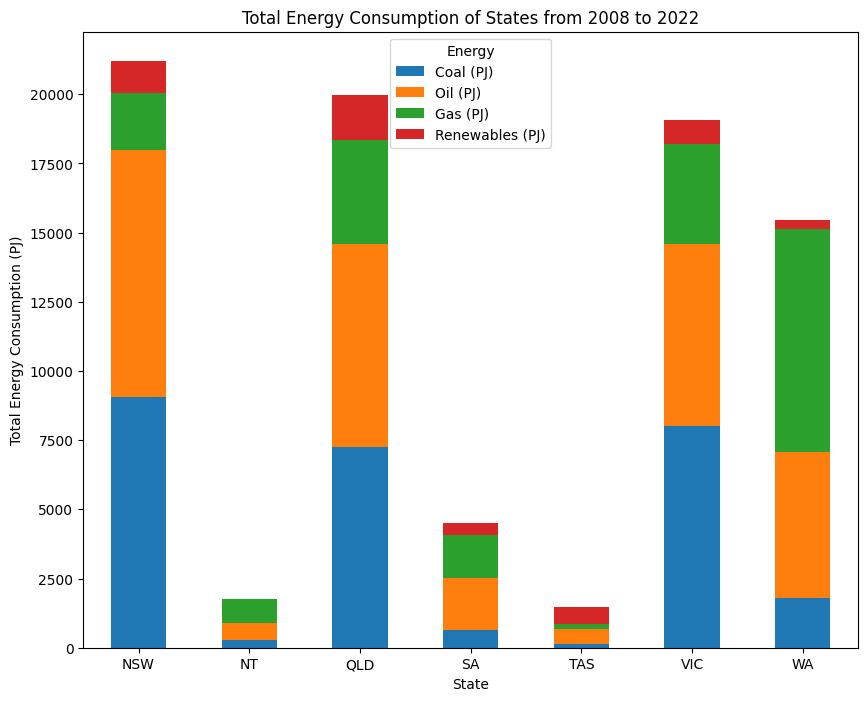

In [ ]:
#Question A1: Compute and visualize the total energy consumption for each state
#Create a stacked bar chart
state_total.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title(f'Total Energy Consumption of States from 2008 to 2022')
plt.xlabel('State')
plt.ylabel(f'Total Energy Consumption (PJ)')
plt.xticks(rotation=0)
plt.legend(title=f'Energy')
plt.show()

##Data Visualization 2: Compute and visualize the total energy consumption by fuel type. (Question A2)

In [ ]:
#Question A2: Compute and visualize the total energy consumption by fuel type
#Transpose the DataFrame using .transpose() - formula by chatgpt
fuel_total = state_total.transpose()
(fuel_total)

State,NSW,NT,QLD,SA,TAS,VIC,WA
Coal (PJ),9076.7,274.568582,7259.9,651.7,143.3,8007.5,1807.8
Oil (PJ),8902.4,628.700000,7338.6,1857.7,545.7,6580.6,5276.3
Gas (PJ),2071.5,862.000000,3747.1,1549.7,167.8,3608.3,8043.2
Renewables (PJ),1148.4,11.600000,1633.6,448.3,618.2,865.1,329.7


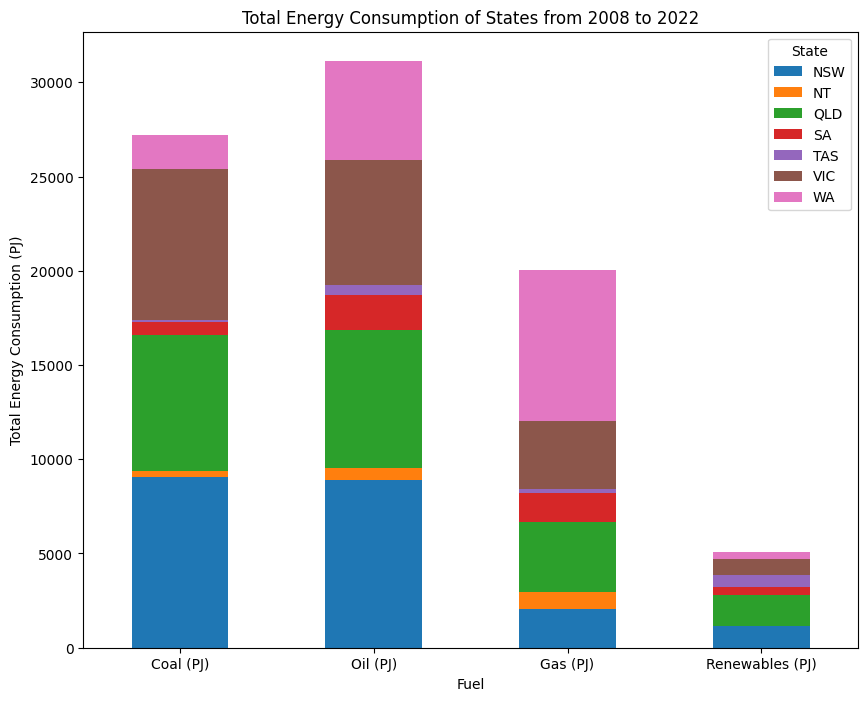

In [ ]:
#Question A2: Compute and visualize the total energy consumption by fuel type
#Create a stacked bar chart
fuel_total.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title(f'Total Energy Consumption of States from 2008 to 2022')
plt.xlabel('Fuel')
plt.ylabel(f'Total Energy Consumption (PJ)')
plt.xticks(rotation=0)
plt.legend(title=f'State')
plt.show()

There is another way to address this question which apply melt function instead of using transpose, and after that calculating the total of each energy

In [ ]:
#Question A2 with melt function to transpose the dataframe
a2_melt_df = AUSenergy_df.melt(id_vars=['State', 'Year'], value_vars=['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)'],
                   var_name='Fuel Type', value_name='Consumption (PJ)')

#display the dataframe after melt function
(a2_melt_df)

,State,Year,Fuel Type,Consumption (PJ)
0,WA,2008-09,Coal (PJ),132.9
1,NSW,2008-09,Coal (PJ),800.9
2,VIC,2008-09,Coal (PJ),695.3
3,QLD,2008-09,Coal (PJ),629.2
4,SA,2008-09,Coal (PJ),80.2
...,...,...,...,...
387,VIC,2021-22,Renewables (PJ),105.2
388,QLD,2021-22,Renewables (PJ),143.0
389,SA,2021-22,Renewables (PJ),48.3
390,TAS,2021-22,Renewables (PJ),48.1


This code use the Melt function to transpose the dataframe from a wide format to a long format, as shown above.

In [ ]:
#compute the total consumption by energy type
total_consumption_by_fuel = a2_melt_df.groupby('Fuel Type')['Consumption (PJ)'].sum().reset_index()

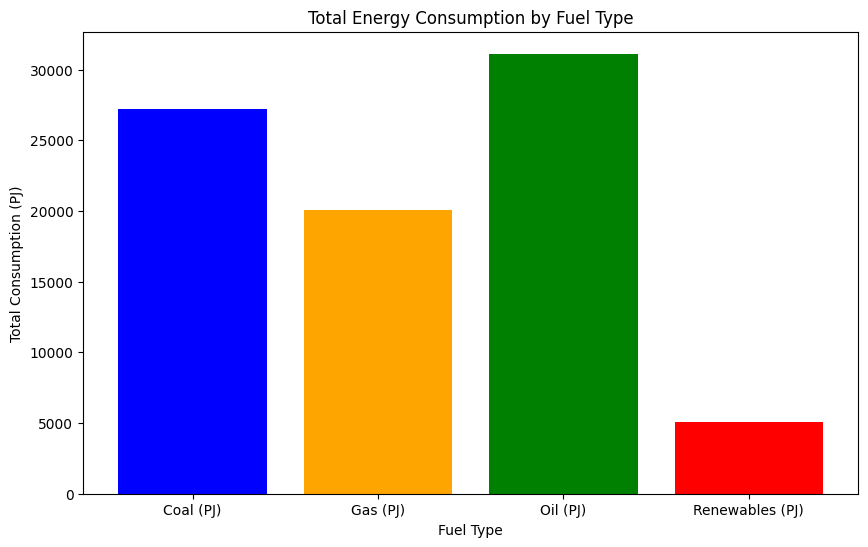

In [ ]:
#create a bar chart to illustrate the total consumption by fuel type
plt.figure(figsize=(10, 6))
plt.bar(total_consumption_by_fuel['Fuel Type'], total_consumption_by_fuel['Consumption (PJ)'], color=['blue', 'orange', 'green', 'red'])
plt.title('Total Energy Consumption by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Total Consumption (PJ)')
plt.show()

It shows that by computing the total amount for each energy type, we have a chart with a easier visualization of the data, however, this chart does not show the contribution of each state's usage in total amounts.

##Data Visualization 3: Analyse and plot the total energy consumption by fuel types for each year. (Question A3)

To address this question, a new dataframe needs to be created by the group of rows with the same Year value and after that a totals across the rows are computed to give the total consumption of each fuel type in each year.

In [ ]:
#Question A3: Analyse and plot the total energy consumption by fuel types for each year
#group data by year
grouped_by_year = AUSenergy_df.groupby(['Year'])

#compute the total energy consumption of 7 states in each year, sum across the rows
year_total = grouped_by_year[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum()

# Display the resulting DataFrame
(year_total)

,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ)
Year,,,,
2008-09,2369.234547,2000.8,1252.8,240.0
2009-10,2243.438816,2058.1,1258.0,282.7
2010-11,2142.661626,2212.0,1274.2,294.7
2011-12,2093.836629,2184.2,1338.6,293.8
2012-13,1950.507673,2278.0,1376.5,333.5
2013-14,1865.502742,2297.2,1383.8,344.4
2014-15,1927.048589,2236.7,1407.0,347.6
2015-16,1974.728570,2279.5,1440.3,360.2
2016-17,1950.169226,2318.0,1477.7,379.1


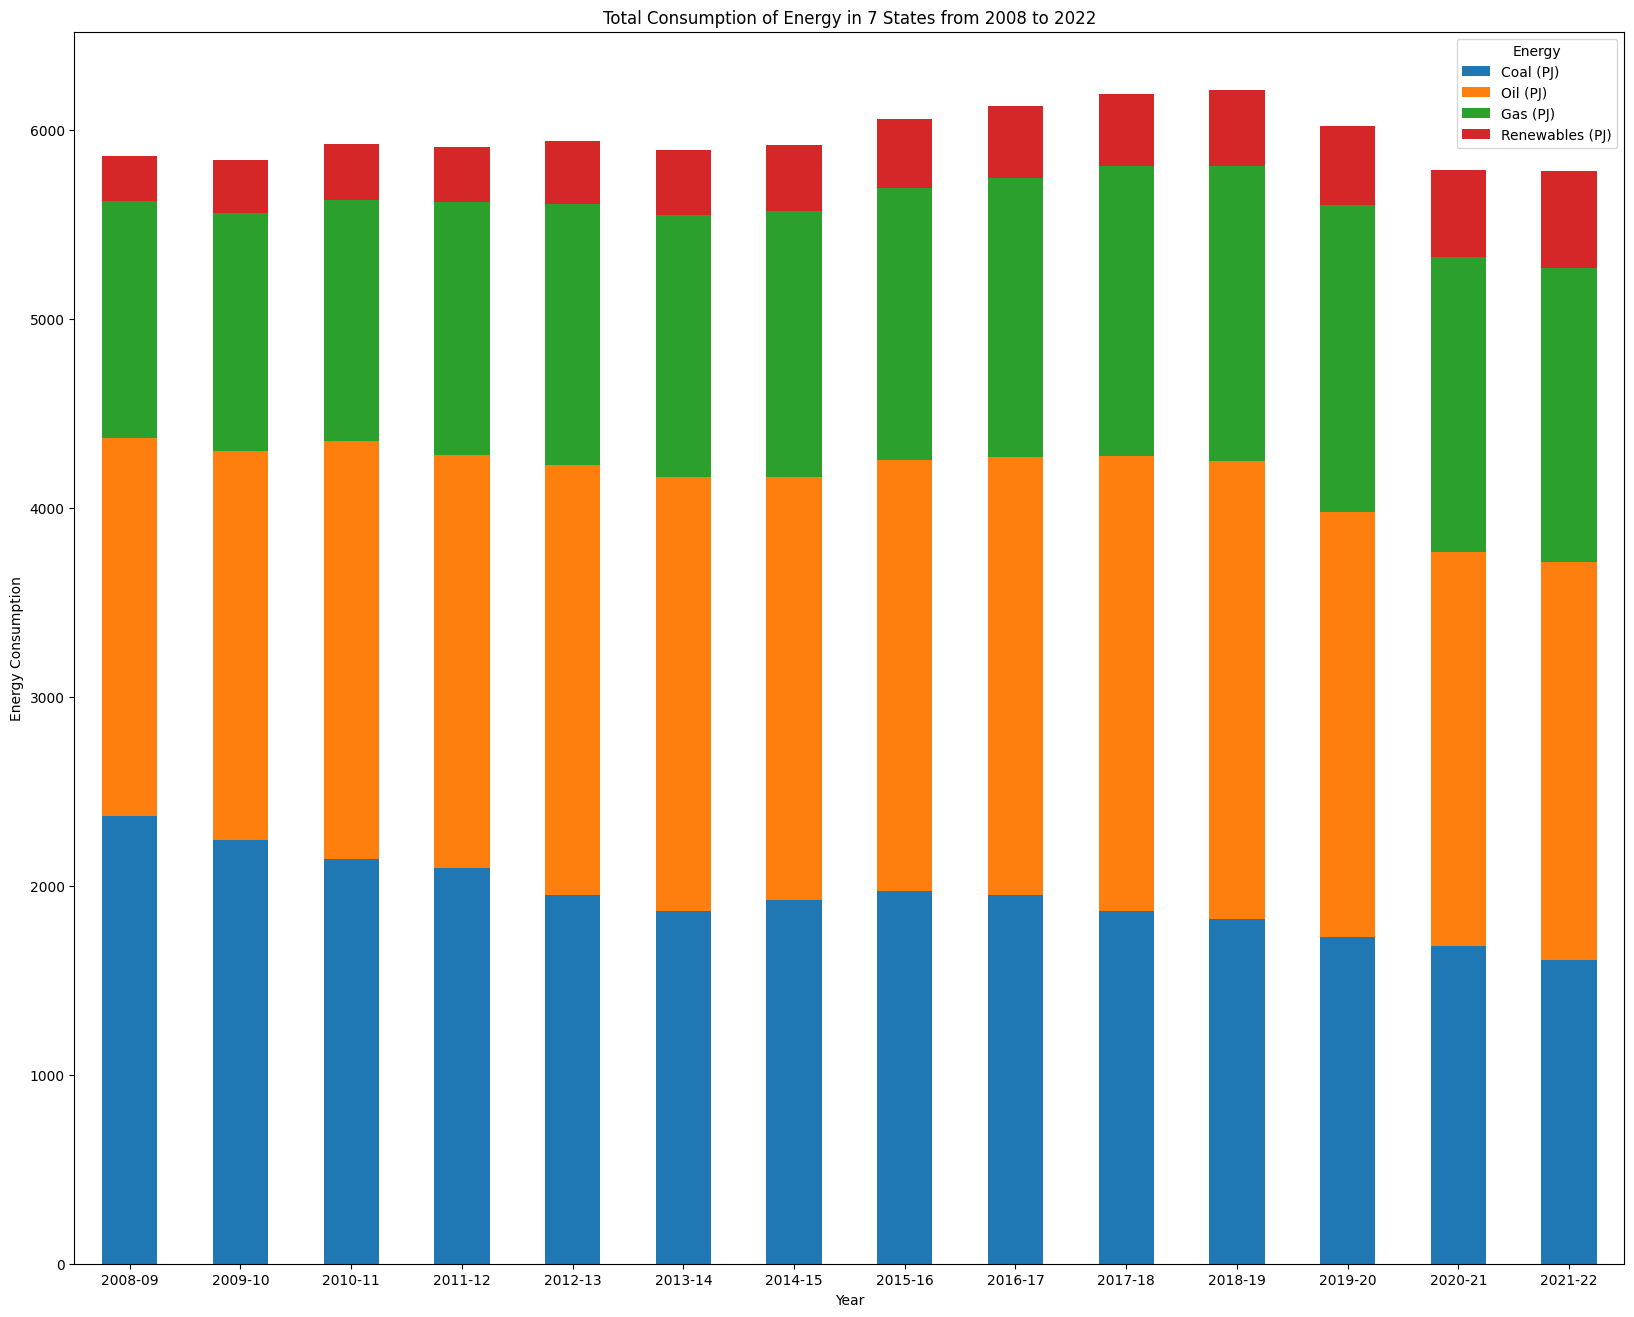

In [ ]:
#Question A3: Analyse and plot the total energy consumption fuel types for each year
#Create a stacked bar chart
year_total.plot(kind='bar', stacked=True, figsize=(20, 16))
plt.title(f'Total Consumption of Energy in 7 States from 2008 to 2022')
plt.xlabel('Year')
plt.ylabel(f'Energy Consumption')
plt.xticks(rotation=0)
plt.legend(title=f'Energy')
plt.show()

##Data Visualization 4: Analyse and visualize the total energy consumption for each state for each year. (Question A4)

To work with this question, firstly we need to split the data to separate dataframe by states by using the filter function in the 'State' column.

In [ ]:
#Question A4: Analyse and visualize the total energy consumption for each state for each year
#split into 1 separate dataframe for each state
a4_nsw_df = AUSenergy_df[AUSenergy_df['State'] == 'NSW'].reset_index(drop=True)
a4_nt_df = AUSenergy_df[AUSenergy_df['State'] == 'NT'].reset_index(drop=True)
a4_qld_df = AUSenergy_df[AUSenergy_df['State'] == 'QLD'].reset_index(drop=True)
a4_sa_df = AUSenergy_df[AUSenergy_df['State'] == 'SA'].reset_index(drop=True)
a4_tas_df = AUSenergy_df[AUSenergy_df['State'] == 'TAS'].reset_index(drop=True)
a4_vic_df = AUSenergy_df[AUSenergy_df['State'] == 'VIC'].reset_index(drop=True)
a4_wa_df = AUSenergy_df[AUSenergy_df['State'] == 'WA'].reset_index(drop=True)

After creating new dataframes, the columns: Population and GSP are removed as they are not relevant or used in this question. The function **df.drop(columns=[''])** is learned and applied here.

Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop

In [ ]:
#Question A4: Analyse and visualize the total energy consumption for each state for each year
#drop irrelevant columns: Population and GSP for relevant display in chart
energy_nsw_df = a4_nsw_df.drop(columns=['Population', 'GSP ($ million)'])
energy_nt_df = a4_nt_df.drop(columns=['Population', 'GSP ($ million)'])
energy_qld_df = a4_qld_df.drop(columns=['Population', 'GSP ($ million)'])
energy_sa_df = a4_sa_df.drop(columns=['Population', 'GSP ($ million)'])
energy_tas_df = a4_tas_df.drop(columns=['Population', 'GSP ($ million)'])
energy_vic_df = a4_vic_df.drop(columns=['Population', 'GSP ($ million)'])
energy_wa_df = a4_wa_df.drop(columns=['Population', 'GSP ($ million)'])

##display one sample dataframe to check the result
(energy_tas_df)

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ)
0,2008-09,TAS,12.4,41.6,11.2,37.1
1,2009-10,TAS,11.5,41.5,13.6,40.0
2,2010-11,TAS,10.1,39.2,17.7,43.1
3,2011-12,TAS,8.9,38.1,16.2,39.8
4,2012-13,TAS,12.0,38.5,17.7,48.5
5,2013-14,TAS,11.0,38.2,12.4,54.2
6,2014-15,TAS,11.3,37.9,6.6,41.3
7,2015-16,TAS,9.7,38.1,12.9,40.9
8,2016-17,TAS,10.7,37.0,13.2,41.9
9,2017-18,TAS,10.5,38.1,13.9,45.9


With the above sample dataframe, we see that the index is the ID numbers, not 'Year'. To fix this, a function of **set.index** is applied. This function works directly on the current dataframe, not creating a new one.

Source: https://stackoverflow.com/questions/73819015/python-pandas-dataframe-keyerror-0-while-iterating-through-the-dataframe-after

In [ ]:
#Question A4: Analyse and visualize the total energy consumption for each state for each year
#set Year as index column - formula from chatgpt
energy0_nsw_df = energy_nsw_df.set_index('Year', inplace=True)
energy0_nt_df = energy_nt_df.set_index('Year', inplace=True)
energy0_qld_df = energy_qld_df.set_index('Year', inplace=True)
energy0_sa_df = energy_sa_df.set_index('Year', inplace=True)
energy0_tas_df = energy_tas_df.set_index('Year', inplace=True)
energy0_vic_df = energy_vic_df.set_index('Year', inplace=True)
energy0_wa_df = energy_wa_df.set_index('Year', inplace=True)

#display one sample dataframe to check the result
(energy_tas_df)

,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ)
Year,,,,,
2008-09,TAS,12.4,41.6,11.2,37.1
2009-10,TAS,11.5,41.5,13.6,40.0
2010-11,TAS,10.1,39.2,17.7,43.1
2011-12,TAS,8.9,38.1,16.2,39.8
2012-13,TAS,12.0,38.5,17.7,48.5
2013-14,TAS,11.0,38.2,12.4,54.2
2014-15,TAS,11.3,37.9,6.6,41.3
2015-16,TAS,9.7,38.1,12.9,40.9
2016-17,TAS,10.7,37.0,13.2,41.9


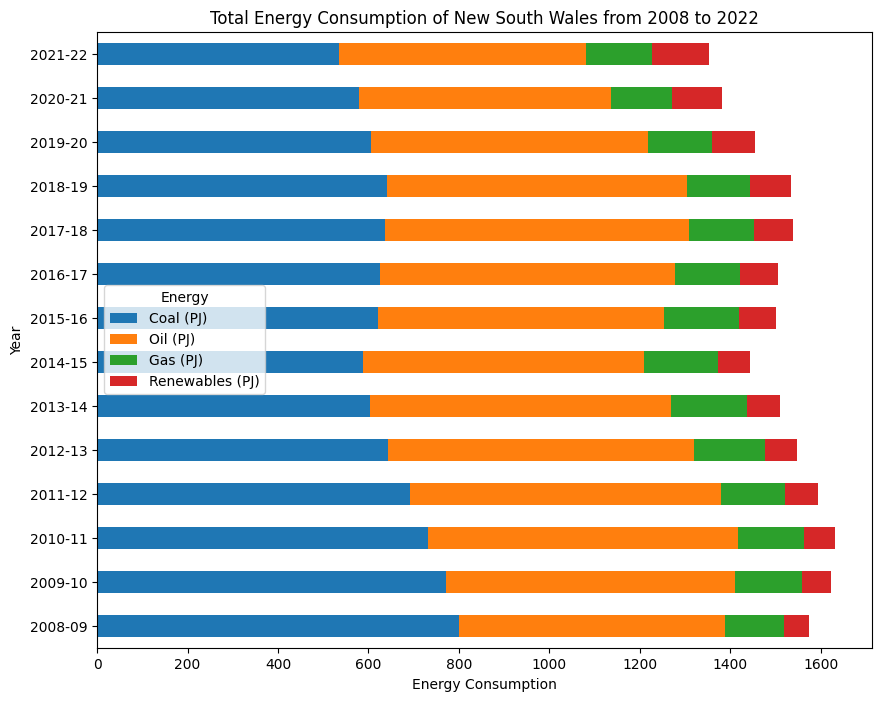

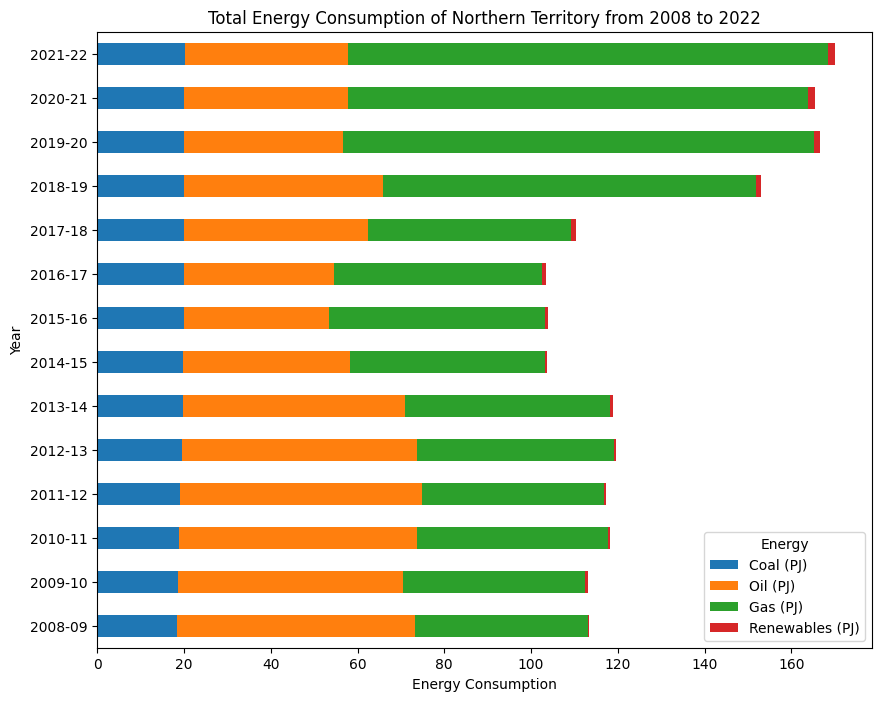

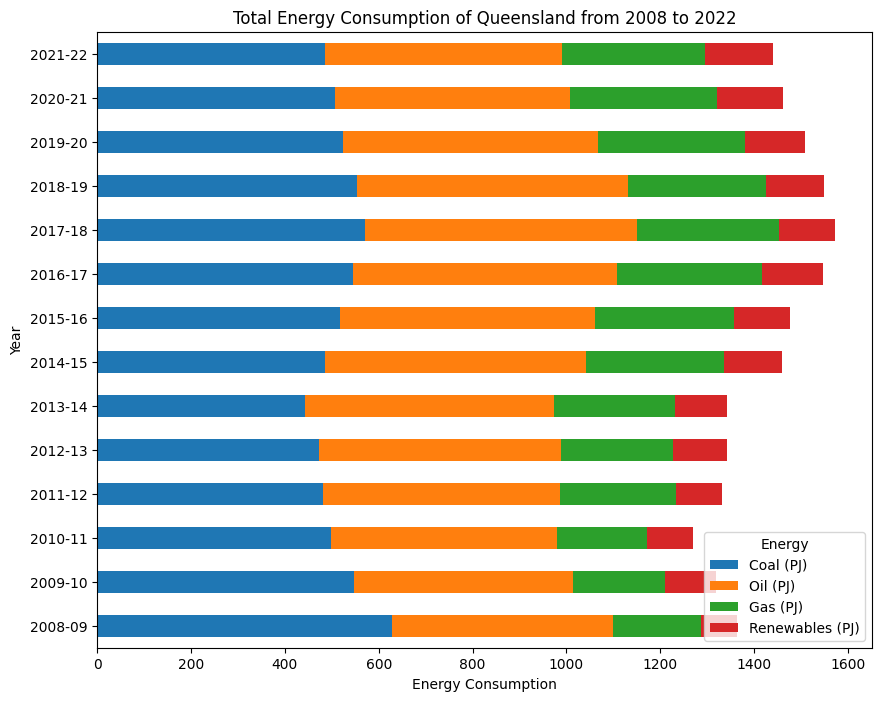

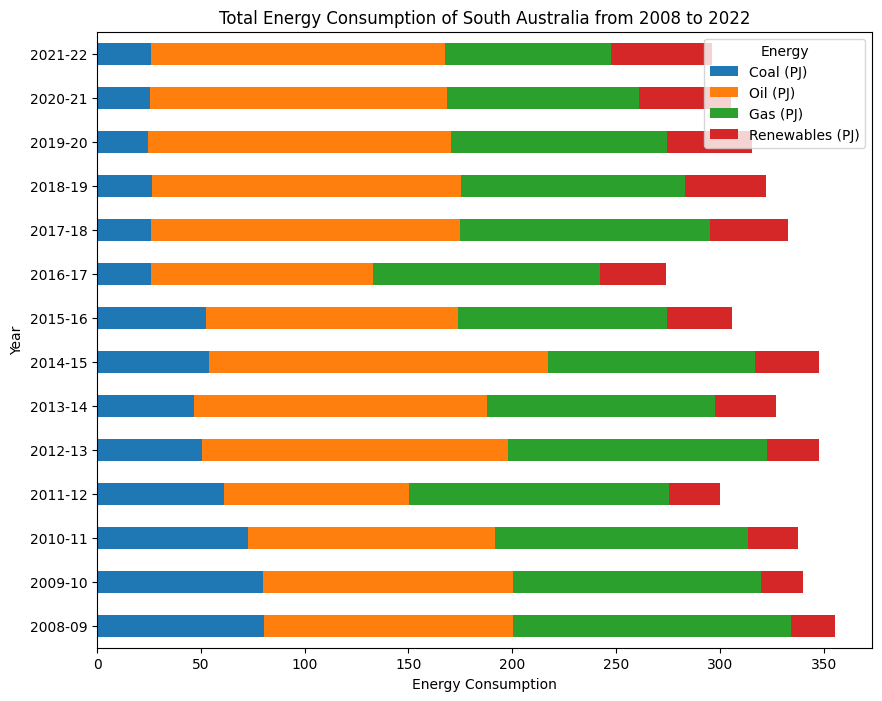

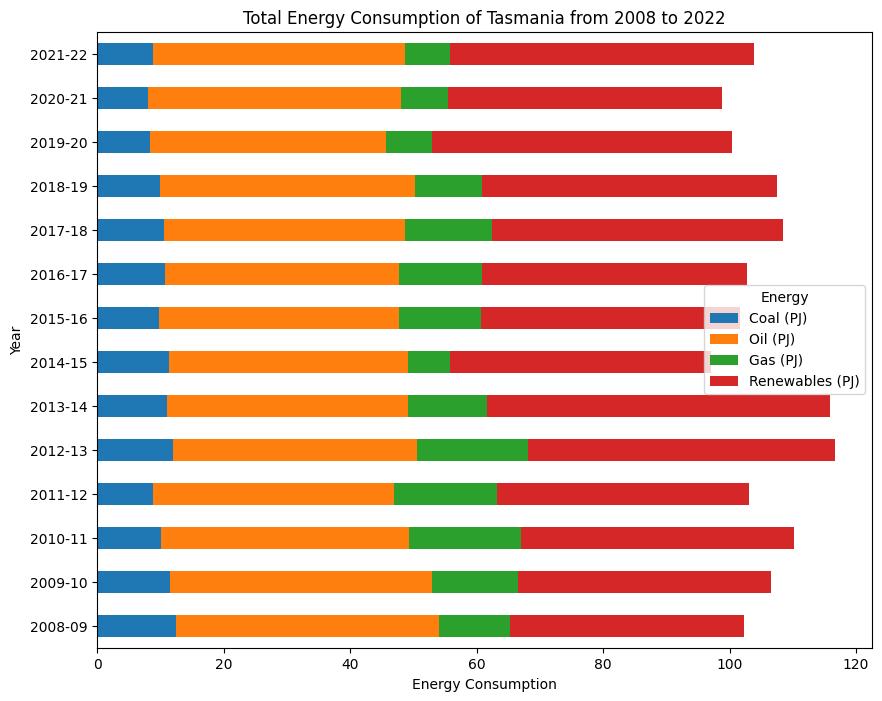

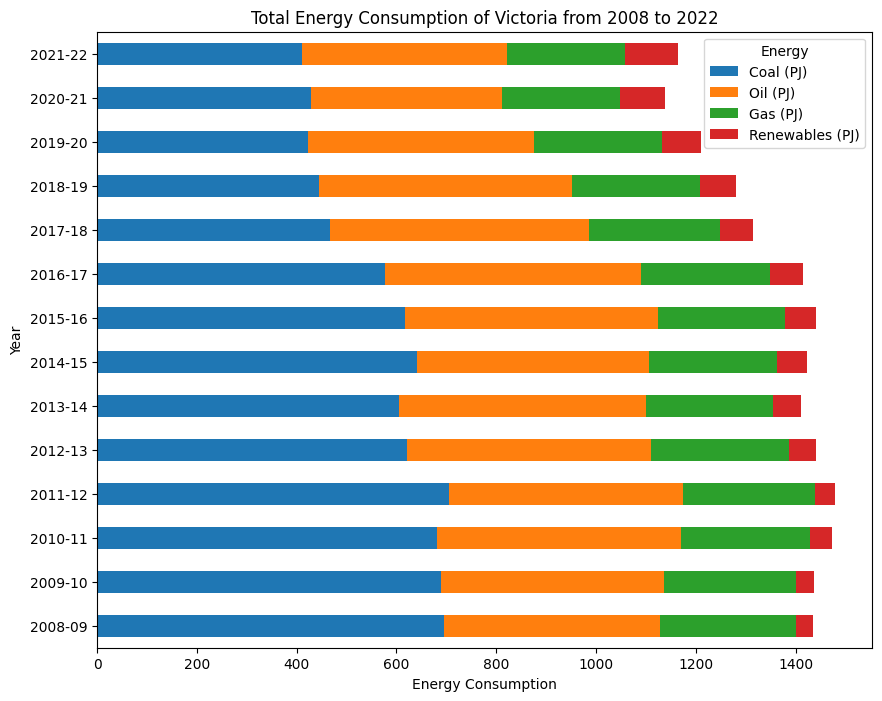

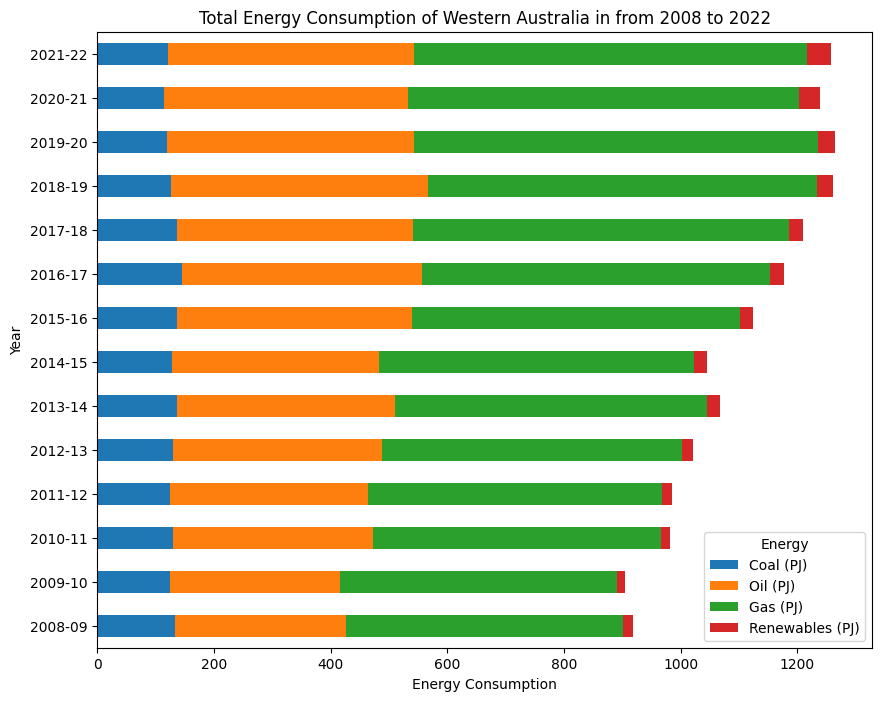

In [ ]:
#Question A4: Analyse and visualize the total energy consumption for each state for each year
#Create a stacked bar chart for New South Wales
energy_nsw_df.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.title(f'Total Energy Consumption of New South Wales from 2008 to 2022')
plt.xlabel('Energy Consumption')
plt.ylabel(f'Year')
plt.xticks(rotation=0)
plt.legend(title=f'Energy')
plt.show()

#Create a stacked bar chart for Northern Territory
energy_nt_df.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.title(f'Total Energy Consumption of Northern Territory from 2008 to 2022')
plt.xlabel('Energy Consumption')
plt.ylabel(f'Year')
plt.xticks(rotation=0)
plt.legend(title=f'Energy')
plt.show()

#Create a stacked bar chart for Queensland
energy_qld_df.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.title(f'Total Energy Consumption of Queensland from 2008 to 2022')
plt.xlabel('Energy Consumption')
plt.ylabel(f'Year')
plt.xticks(rotation=0)
plt.legend(title=f'Energy')
plt.show()

#Create a stacked bar chart for South Australia
energy_sa_df.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.title(f'Total Energy Consumption of South Australia from 2008 to 2022')
plt.xlabel('Energy Consumption')
plt.ylabel(f'Year')
plt.xticks(rotation=0)
plt.legend(title=f'Energy')
plt.show()

#Create a stacked bar chart for Tasmania
energy_tas_df.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.title(f'Total Energy Consumption of Tasmania from 2008 to 2022')
plt.xlabel('Energy Consumption')
plt.ylabel(f'Year')
plt.xticks(rotation=0)
plt.legend(title=f'Energy')
plt.show()

#Create a stacked bar chart for Victoria
energy_vic_df.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.title(f'Total Energy Consumption of Victoria from 2008 to 2022')
plt.xlabel('Energy Consumption')
plt.ylabel(f'Year')
plt.xticks(rotation=0)
plt.legend(title=f'Energy')
plt.show()

#Create a stacked bar chart for uWestern Australia
energy_wa_df.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.title(f'Total Energy Consumption of Western Australia in from 2008 to 2022')
plt.xlabel('Energy Consumption')
plt.ylabel(f'Year')
plt.xticks(rotation=0)
plt.legend(title=f'Energy')
plt.show()

This approach is complicated as it requires one step to set.index for 'Year' and makes 7 separate charts, causing difficulties in analysis and comparison. So, let's try another approach with pivot_table function for this question.

In [ ]:
#Question A4 with pivot table
#drop irrelevant columns: Population, GSP
a4_AUSenergy_df = AUSenergy_df.drop(columns=['Population', 'GSP ($ million)'])

#compute the total energy in a new column named 'Total Energy (PJ)'
a4_AUSenergy_df['Total Energy (PJ)'] = a4_AUSenergy_df[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum(axis=1)

A pivot table is applied to consolidated the data by the 'State' and 'Fuel Type' fields. Pivot table function **df.pivot_table(values='Total Energy (PJ)', index='Year', columns= 'State', aggfunc='sum')** is learned and applied here.

Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html

In [ ]:
#Question A4 with pivot table
#create a pivot table to aggregate total energy consumption by state and year
pivot_a4_AUSenergy_df = a4_AUSenergy_df.pivot_table(values='Total Energy (PJ)', index='Year', columns= 'State', aggfunc='sum')

#display dataframe to check
(pivot_a4_AUSenergy_df )

State,NSW,NT,QLD,SA,TAS,VIC,WA
Year,,,,,,,
2008-09,1574.7,113.434547,1364.0,355.6,102.3,1435.3,917.5
2009-10,1623.2,113.038816,1317.6,340.1,106.6,1436.6,905.1
2010-11,1632.3,118.261626,1269.8,337.5,110.1,1473.3,982.3
2011-12,1593.3,117.336629,1332.1,300.2,103.0,1479.6,984.9
2012-13,1548.7,119.607673,1342.1,347.8,116.7,1442.0,1021.6
2013-14,1509.9,118.902742,1341.7,326.9,115.8,1411.1,1066.6
2014-15,1443.7,103.748589,1458.2,347.6,97.1,1422.6,1045.4
2015-16,1501.7,103.828570,1477.1,306.0,101.6,1440.6,1123.9
2016-17,1506.6,103.369226,1547.0,274.2,102.8,1414.0,1177.0


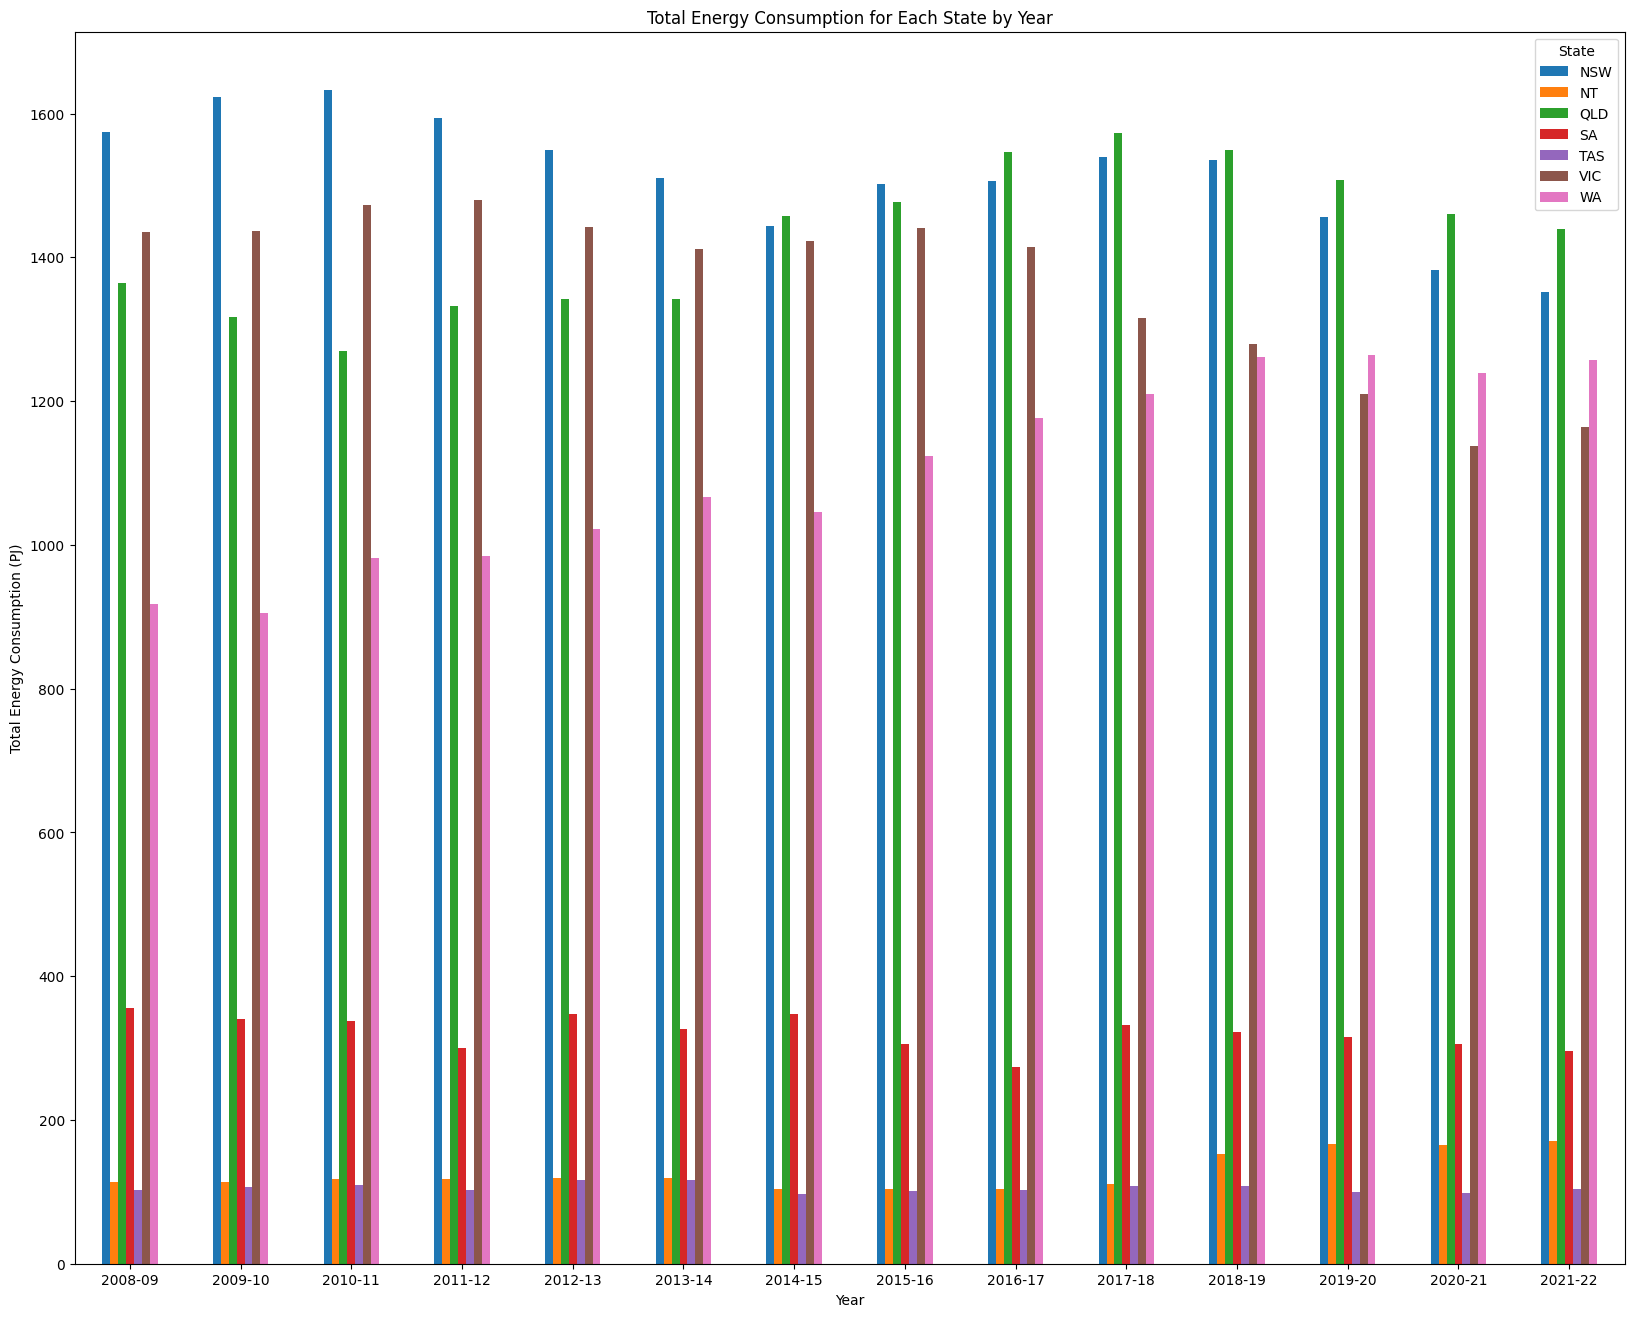

In [ ]:
#Question A4 with pivot table
#visualize the pivot table
pivot_a4_AUSenergy_df.plot(kind='bar', figsize=(20, 16))
plt.title('Total Energy Consumption for Each State by Year')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption (PJ)')
plt.legend(title='State')
plt.xticks(rotation=0)
plt.show()

## Data Visualization 5: Analyse and visualize the total energy consumption for each state for each year. (Question B5)

To address this question, the same approach with Question A4 is applied by filtering for state, drop irrelevant columns. Besides, a function **transpose** is applied to transform the dataframe and a function **iloc** is applied to make 'Year' the index of the table so it can be used in the legend.

In [ ]:
#Question B5: Analyse and visualise the total energy consumption for each state, broken down by fuel type.
#split into 1 separate dataframe by filtering for each state
b5_nsw_df = AUSenergy_df[AUSenergy_df['State'] == 'NSW'].reset_index(drop=True)
b5_nt_df = AUSenergy_df[AUSenergy_df['State'] == 'NT'].reset_index(drop=True)
b5_qld_df = AUSenergy_df[AUSenergy_df['State'] == 'QLD'].reset_index(drop=True)
b5_sa_df = AUSenergy_df[AUSenergy_df['State'] == 'SA'].reset_index(drop=True)
b5_tas_df = AUSenergy_df[AUSenergy_df['State'] == 'TAS'].reset_index(drop=True)
b5_vic_df = AUSenergy_df[AUSenergy_df['State'] == 'VIC'].reset_index(drop=True)
b5_wa_df = AUSenergy_df[AUSenergy_df['State'] == 'WA'].reset_index(drop=True)

#drop irrelevant columns: 'State', 'Population' and 'GSP'
fuel_nsw_df = b5_nsw_df.drop(columns=['State','Population', 'GSP ($ million)'])
fuel_nt_df = b5_nt_df.drop(columns=['State','Population', 'GSP ($ million)'])
fuel_qld_df = b5_qld_df.drop(columns=['State','Population', 'GSP ($ million)'])
fuel_sa_df = b5_sa_df.drop(columns=['State','Population', 'GSP ($ million)'])
fuel_tas_df = b5_tas_df.drop(columns=['State','Population', 'GSP ($ million)'])
fuel_vic_df = b5_vic_df.drop(columns=['State','Population', 'GSP ($ million)'])
fuel_wa_df = b5_wa_df.drop(columns=['State','Population', 'GSP ($ million)'])

#tranpose the dataframes
T_fuel_nsw_df = fuel_nsw_df.transpose()
T_fuel_nt_df = fuel_nt_df.transpose()
T_fuel_qld_df = fuel_qld_df.transpose()
T_fuel_sa_df = fuel_sa_df.transpose()
T_fuel_tas_df = fuel_tas_df.transpose()
T_fuel_vic_df = fuel_vic_df.transpose()
T_fuel_wa_df = fuel_wa_df.transpose()

#make Year as a header for legend
T_fuel_nsw_df.columns = T_fuel_nsw_df.iloc[0]
T_fuel_nt_df.columns = T_fuel_nt_df.iloc[0]
T_fuel_qld_df.columns = T_fuel_qld_df.iloc[0]
T_fuel_sa_df.columns = T_fuel_sa_df.iloc[0]
T_fuel_tas_df.columns = T_fuel_tas_df.iloc[0]
T_fuel_vic_df.columns = T_fuel_vic_df.iloc[0]
T_fuel_wa_df.columns = T_fuel_wa_df.iloc[0]

#drop irrelevant row
T_fuel_nsw_df = T_fuel_nsw_df.drop(T_fuel_nsw_df.index[0])
T_fuel_nt_df = T_fuel_nt_df.drop(T_fuel_nt_df.index[0])
T_fuel_qld_df = T_fuel_qld_df.drop(T_fuel_qld_df.index[0])
T_fuel_sa_df = T_fuel_sa_df.drop(T_fuel_sa_df.index[0])
T_fuel_tas_df = T_fuel_tas_df.drop(T_fuel_tas_df.index[0])
T_fuel_vic_df = T_fuel_vic_df.drop(T_fuel_vic_df.index[0])
T_fuel_wa_df = T_fuel_wa_df.drop(T_fuel_wa_df.index[0])

#display a same dataframe to verify
(b5_nt_df)

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,NT,18.334547,54.8,39.9,0.4,226027,19562
1,2009-10,NT,18.638816,51.9,42.0,0.5,229778,19469
2,2010-11,NT,18.761626,54.9,44.1,0.5,231292,20035
3,2011-12,NT,19.136629,55.7,42.0,0.5,235915,20841
4,2012-13,NT,19.607673,54.2,45.3,0.5,241722,22263
5,2013-14,NT,19.702742,51.2,47.4,0.6,242894,22530
6,2014-15,NT,19.848589,38.4,44.9,0.6,244692,22827
7,2015-16,NT,19.928570,33.4,49.8,0.7,245678,23275
8,2016-17,NT,20.069226,34.4,48.1,0.8,247412,23616
9,2017-18,NT,20.043513,42.3,46.9,1.0,247095,24072


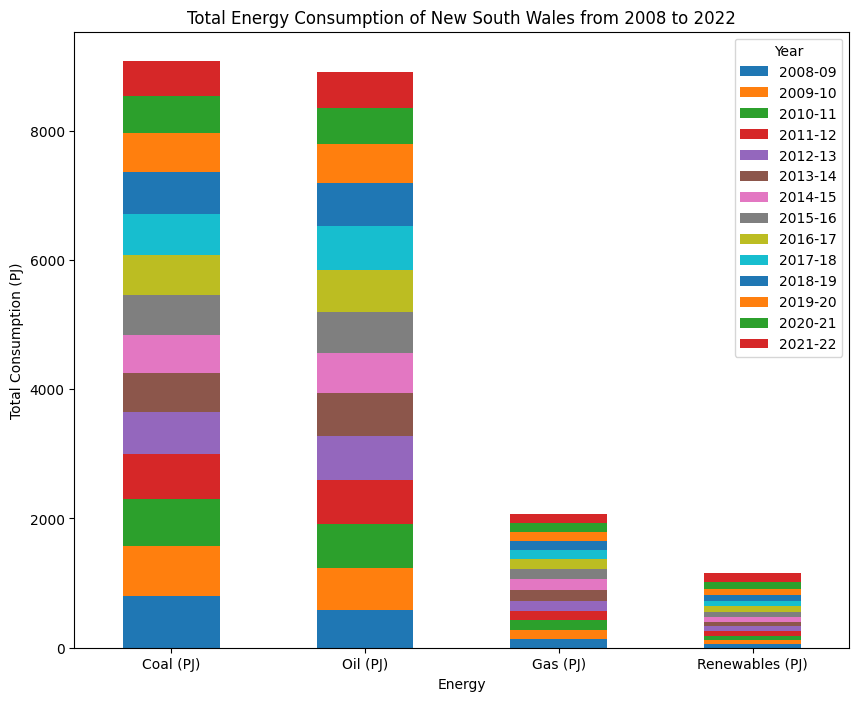

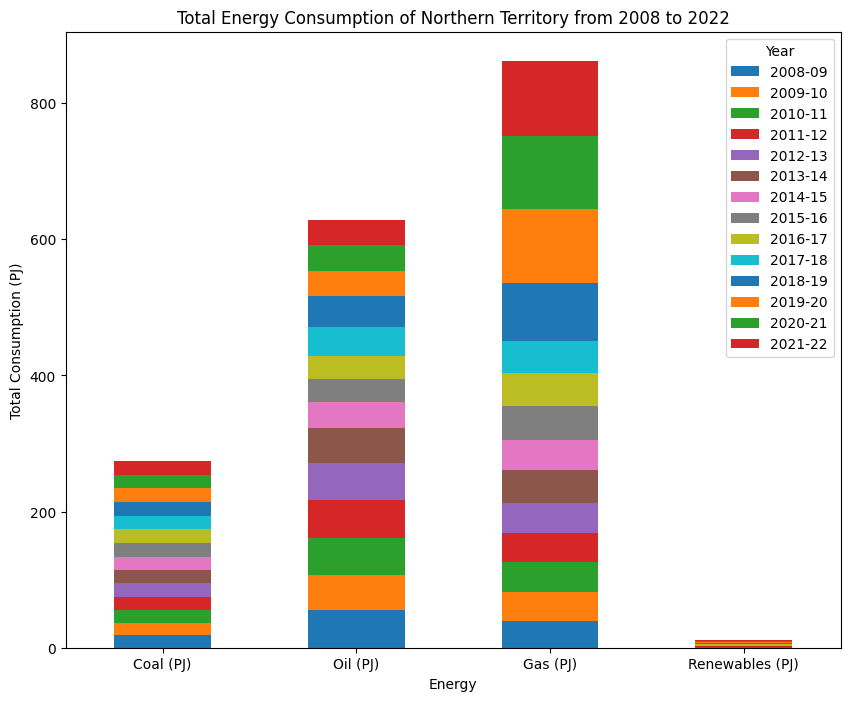

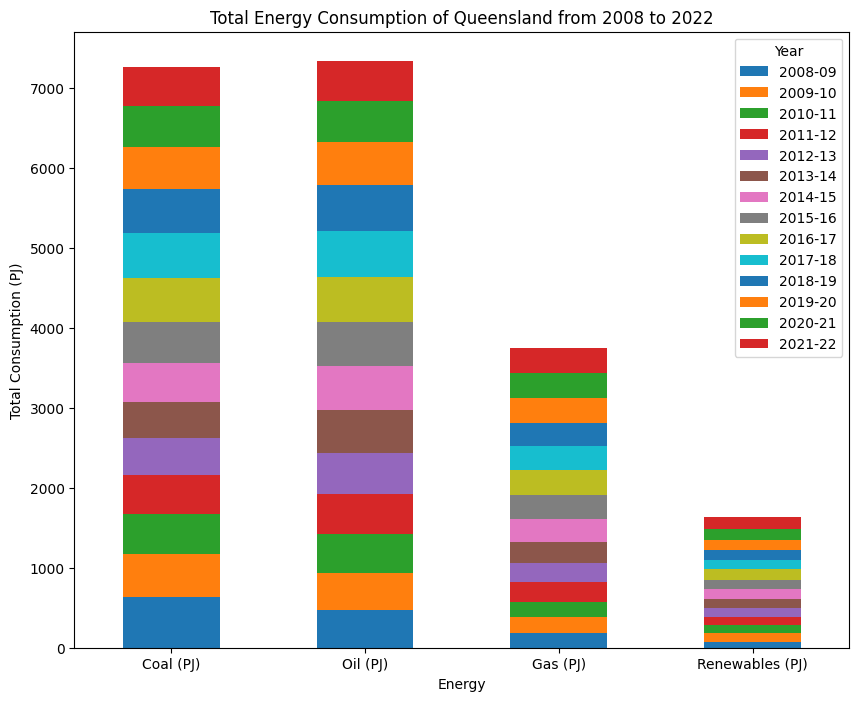

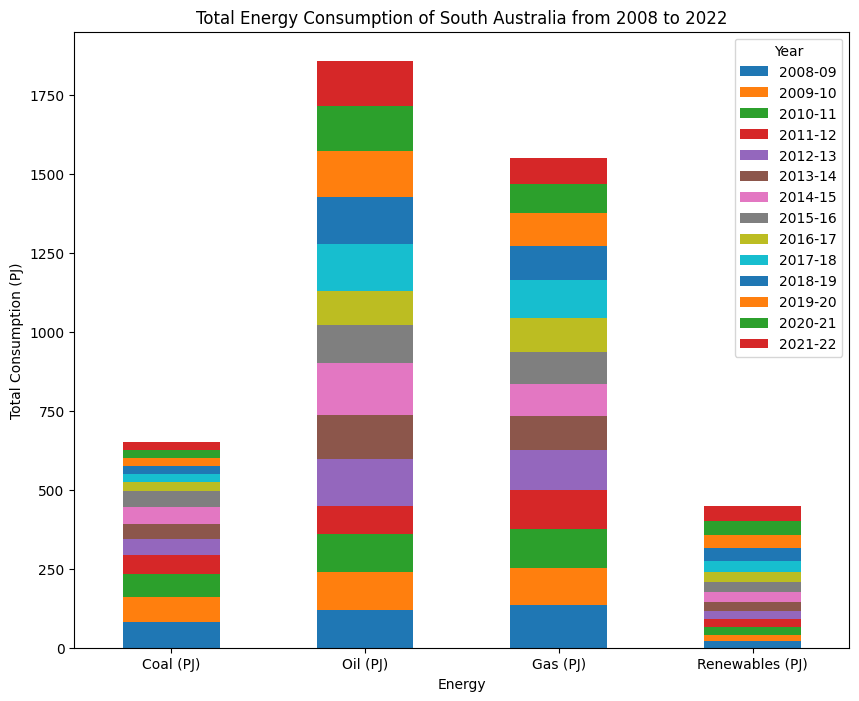

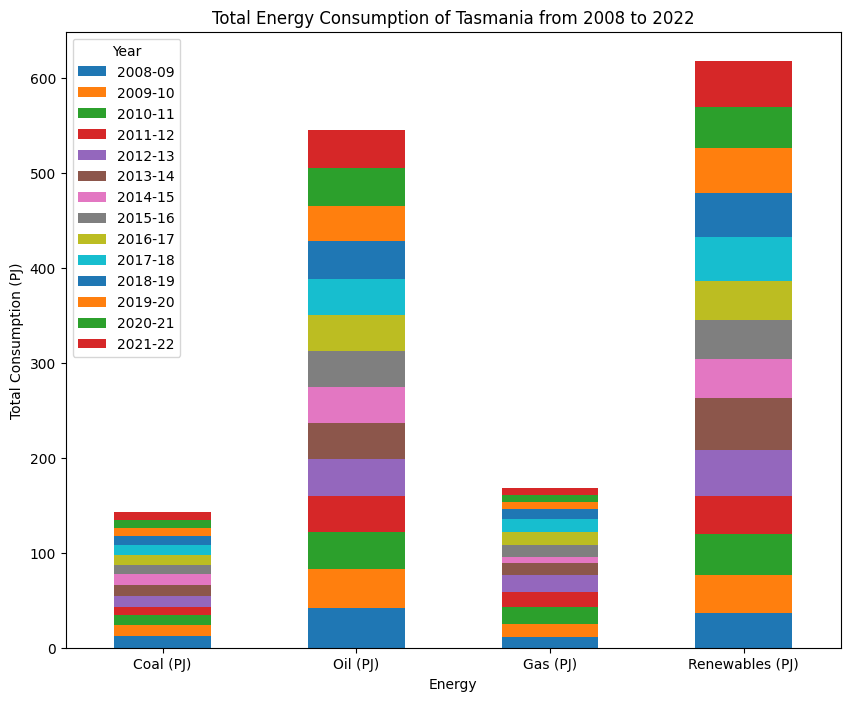

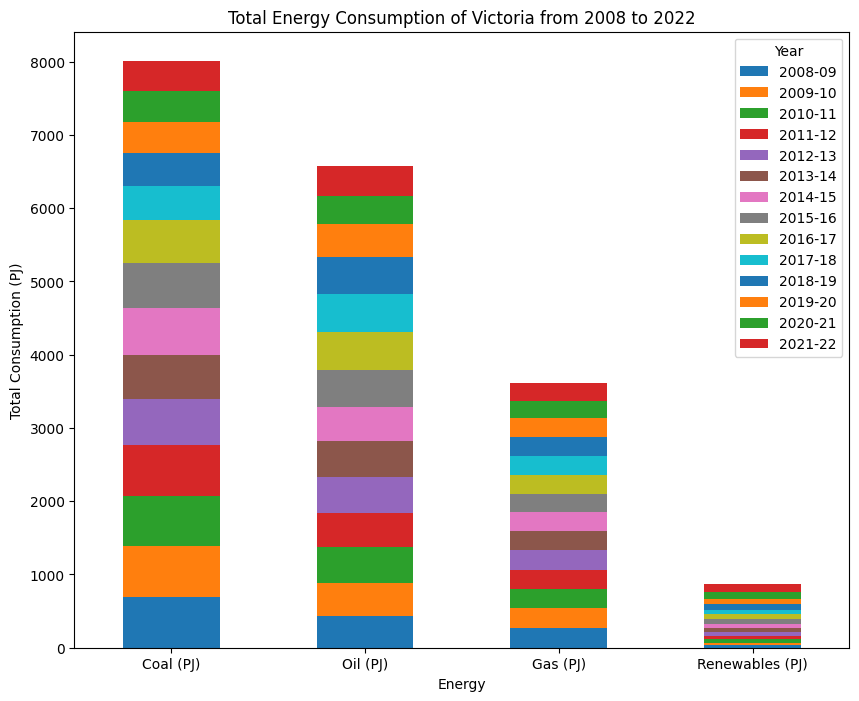

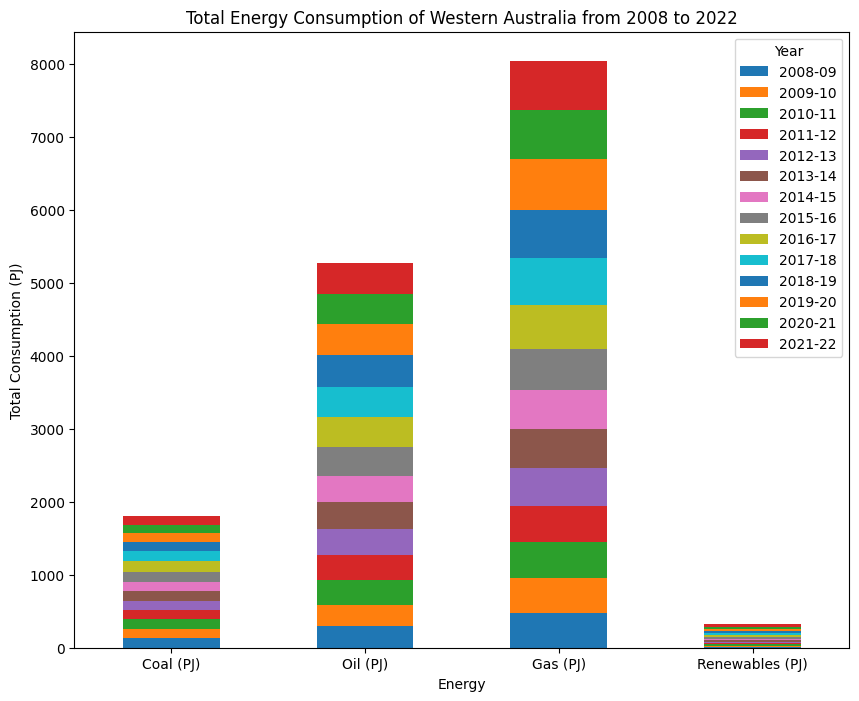

In [ ]:
#Question B5: Analyse and visualise the total energy consumption for each state, broken down by fuel type.
#Create a stacked bar chart for New South Wales
T_fuel_nsw_df.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title(f'Total Energy Consumption of New South Wales from 2008 to 2022')
plt.xlabel('Energy')
plt.ylabel(f'Total Consumption (PJ)')
plt.xticks(rotation=0)
plt.legend(title=f'Year')
plt.show()

#Create a stacked bar chart for Northern Territory
T_fuel_nt_df.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title(f'Total Energy Consumption of Northern Territory from 2008 to 2022')
plt.xlabel('Energy')
plt.ylabel(f'Total Consumption (PJ)')
plt.xticks(rotation=0)
plt.legend(title=f'Year')
plt.show()

#Create a stacked bar chart for Queensland
T_fuel_qld_df.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title(f'Total Energy Consumption of Queensland from 2008 to 2022')
plt.xlabel('Energy')
plt.ylabel(f'Total Consumption (PJ)')
plt.xticks(rotation=0)
plt.legend(title=f'Year')
plt.show()

#Create a stacked bar chart for South Australia
T_fuel_sa_df.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title(f'Total Energy Consumption of South Australia from 2008 to 2022')
plt.xlabel('Energy')
plt.ylabel(f'Total Consumption (PJ)')
plt.xticks(rotation=0)
plt.legend(title=f'Year')
plt.show()

#Create a stacked bar chart for Tasmania
T_fuel_tas_df.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title(f'Total Energy Consumption of Tasmania from 2008 to 2022')
plt.xlabel('Energy')
plt.ylabel(f'Total Consumption (PJ)')
plt.xticks(rotation=0)
plt.legend(title=f'Year')
plt.show()

#Create a stacked bar chart for Victoria
T_fuel_vic_df.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title(f'Total Energy Consumption of Victoria from 2008 to 2022')
plt.xlabel('Energy')
plt.ylabel(f'Total Consumption (PJ)')
plt.xticks(rotation=0)
plt.legend(title=f'Year')
plt.show()

#Create a stacked bar chart for Western Australia
T_fuel_wa_df.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title(f'Total Energy Consumption of Western Australia from 2008 to 2022')
plt.xlabel('Energy')
plt.ylabel(f'Total Consumption (PJ)')
plt.xticks(rotation=0)
plt.legend(title=f'Year')
plt.show()

This approach is complicated because it needs to set.index for the 'Year' and also results in 7 charts and messy visualization. So, a new approach by melt function and then pivot table to make a simple visualization.

In [ ]:
#Question B5 with pivot function
#drop irrelevant columns: 'Population', 'GSP'
b5_AUSenergy_df = AUSenergy_df.drop(columns=['Population', 'GSP ($ million)'])

#transpose the dataframe with melt
melted_b5_AUSenergy_df = b5_AUSenergy_df.melt(id_vars=['State', 'Year'], value_vars=['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)'],
                    var_name='Fuel Type', value_name='Consumption (PJ)')

In [ ]:
#create a dataframe with pivot table
pivot_b5_AUSenergy_df = melted_b5_AUSenergy_df.pivot_table(values='Consumption (PJ)', index='State', columns='Fuel Type', aggfunc='sum')

(pivot_b5_AUSenergy_df)

Fuel Type,Coal (PJ),Gas (PJ),Oil (PJ),Renewables (PJ)
State,,,,
NSW,9076.700000,2071.5,8902.4,1148.4
NT,274.568582,862.0,628.7,11.6
QLD,7259.900000,3747.1,7338.6,1633.6
SA,651.700000,1549.7,1857.7,448.3
TAS,143.300000,167.8,545.7,618.2
VIC,8007.500000,3608.3,6580.6,865.1
WA,1807.800000,8043.2,5276.3,329.7


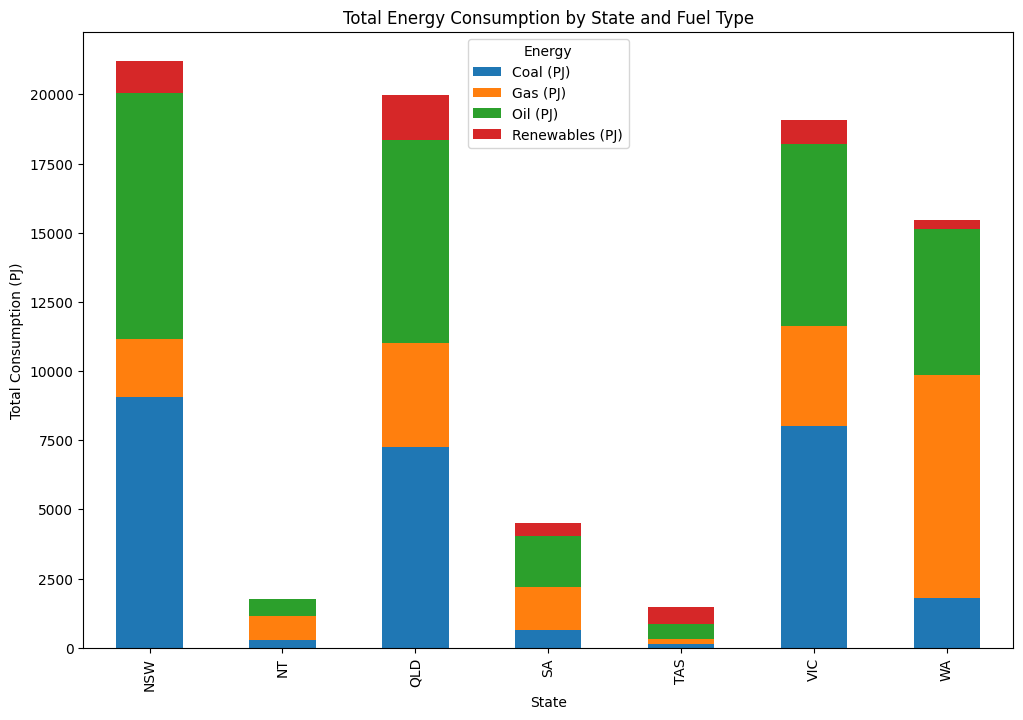

In [ ]:
#create a chart with the pivot table
pivot_b5_AUSenergy_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total Energy Consumption by State and Fuel Type')
plt.xlabel('State')
plt.ylabel('Total Consumption (PJ)')
plt.legend(title='Energy')
plt.show()

It is evidently that this approach create a unique chart with better visualization for comparison and analysis.

##Data Visualization 6: Determine energy productivity for each state annually and visualize the results. (Question B7)

To address this question, like previous ones, specific dataframes are created by filtering by 'State'.

In [ ]:
#Question B7: Determine energy productivity, defined as Gross State Product (GSP) per unit of energy consumed, for each state annually and visualize the results.
#split into 1 separate dataframe for each state
b7_nsw_df = AUSenergy_df[AUSenergy_df['State'] == 'NSW'].reset_index(drop=True)
b7_nt_df = AUSenergy_df[AUSenergy_df['State'] == 'NT'].reset_index(drop=True)
b7_qld_df = AUSenergy_df[AUSenergy_df['State'] == 'QLD'].reset_index(drop=True)
b7_sa_df = AUSenergy_df[AUSenergy_df['State'] == 'SA'].reset_index(drop=True)
b7_tas_df = AUSenergy_df[AUSenergy_df['State'] == 'TAS'].reset_index(drop=True)
b7_vic_df = AUSenergy_df[AUSenergy_df['State'] == 'VIC'].reset_index(drop=True)
b7_wa_df = AUSenergy_df[AUSenergy_df['State'] == 'WA'].reset_index(drop=True)

#display sample dataframe to check
(b7_tas_df)

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,TAS,12.4,41.6,11.2,37.1,504353,28165
1,2009-10,TAS,11.5,41.5,13.6,40.0,508847,28402
2,2010-11,TAS,10.1,39.2,17.7,43.1,511483,29078
3,2011-12,TAS,8.9,38.1,16.2,39.8,511724,29644
4,2012-13,TAS,12.0,38.5,17.7,48.5,512231,29474
5,2013-14,TAS,11.0,38.2,12.4,54.2,513621,29910
6,2014-15,TAS,11.3,37.9,6.6,41.3,515117,30235
7,2015-16,TAS,9.7,38.1,12.9,40.9,517514,30763
8,2016-17,TAS,10.7,37.0,13.2,41.9,526762,31119
9,2017-18,TAS,10.5,38.1,13.9,45.9,537291,32226


This question studies the energy productivity of each state in each year, which is computed with the following formula:

**Energy Productivity ($ million/PJ) = Yearly GSP / Total Annual Energy Consumption**

Based on this formula, a code is applied to compute the Yearly Energy Productivity of each state and put the result in the relevant column named 'Productivity ($ million/PJ)' of the relevant dataframe.

In [ ]:
#Question B7: Determine energy productivity, defined as Gross State Product (GSP) per unit of energy consumed, for each state annually and visualize the results.
#compute the energy productivity
b7_nsw_df['Productivity ($ million/PJ)'] = b7_nsw_df['GSP ($ million)'] / (b7_nsw_df['Coal (PJ)'] + b7_nsw_df['Oil (PJ)'] + b7_nsw_df['Gas (PJ)'] + b7_nsw_df['Renewables (PJ)'])
b7_nt_df['Productivity ($ million/PJ)'] = b7_nt_df['GSP ($ million)'] / (b7_nt_df['Coal (PJ)'] + b7_nt_df['Oil (PJ)'] + b7_nt_df['Gas (PJ)'] + b7_nt_df['Renewables (PJ)'])
b7_qld_df['Productivity ($ million/PJ)'] = b7_qld_df['GSP ($ million)'] / (b7_qld_df['Coal (PJ)'] + b7_qld_df['Oil (PJ)'] + b7_qld_df['Gas (PJ)'] + b7_qld_df['Renewables (PJ)'])
b7_sa_df['Productivity ($ million/PJ)'] = b7_sa_df['GSP ($ million)'] / (b7_sa_df['Coal (PJ)'] + b7_sa_df['Oil (PJ)'] + b7_sa_df['Gas (PJ)'] + b7_sa_df['Renewables (PJ)'])
b7_tas_df['Productivity ($ million/PJ)'] = b7_tas_df['GSP ($ million)'] / (b7_tas_df['Coal (PJ)'] + b7_tas_df['Oil (PJ)'] + b7_tas_df['Gas (PJ)'] + b7_tas_df['Renewables (PJ)'])
b7_vic_df['Productivity ($ million/PJ)'] = b7_vic_df['GSP ($ million)'] / (b7_vic_df['Coal (PJ)'] + b7_vic_df['Oil (PJ)'] + b7_vic_df['Gas (PJ)'] + b7_vic_df['Renewables (PJ)'])
b7_wa_df['Productivity ($ million/PJ)'] = b7_wa_df['GSP ($ million)'] / (b7_wa_df['Coal (PJ)'] + b7_wa_df['Oil (PJ)'] + b7_wa_df['Gas (PJ)'] + b7_wa_df['Renewables (PJ)'])

After that, it is proceeded as previous questions by dropping irrelevant columns and set Year as index so x-axis will display by Year.

In [ ]:
#Question B7: Determine energy productivity, defined as Gross State Product (GSP) per unit of energy consumed, for each state annually and visualize the results.
#drop irrelevant columns
productivity_nsw_df = b7_nsw_df.drop(columns=['State', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)','Population', 'GSP ($ million)'])
productivity_nt_df = b7_nt_df.drop(columns=['State', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)','Population', 'GSP ($ million)'])
productivity_qld_df = b7_qld_df.drop(columns=['State', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)','Population', 'GSP ($ million)'])
productivity_sa_df = b7_sa_df.drop(columns=['State', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)','Population', 'GSP ($ million)'])
productivity_tas_df = b7_tas_df.drop(columns=['State', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)','Population', 'GSP ($ million)'])
productivity_vic_df = b7_vic_df.drop(columns=['State', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)','Population', 'GSP ($ million)'])
productivity_wa_df = b7_wa_df.drop(columns=['State', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)','Population', 'GSP ($ million)'])

#set index Year
productivity0_nsw_df = productivity_nsw_df.set_index('Year', inplace=True)
productivity0_nt_df = productivity_nt_df.set_index('Year', inplace=True)
productivity0_qld_df = productivity_qld_df.set_index('Year', inplace=True)
productivity0_sa_df = productivity_sa_df.set_index('Year', inplace=True)
productivity0_tas_df = productivity_tas_df.set_index('Year', inplace=True)
productivity0_vic_df = productivity_vic_df.set_index('Year', inplace=True)
productivity0_wa_df = productivity_wa_df.set_index('Year', inplace=True)

#display a sample dataframe to check
(productivity_nt_df)

,Productivity ($ million/PJ)
Year,
2008-09,172.451871
2009-10,172.232873
2010-11,169.412519
2011-12,177.617171
2012-13,186.133544
2013-14,189.482595
2014-15,220.022269
2015-16,224.167586
2016-17,228.462578


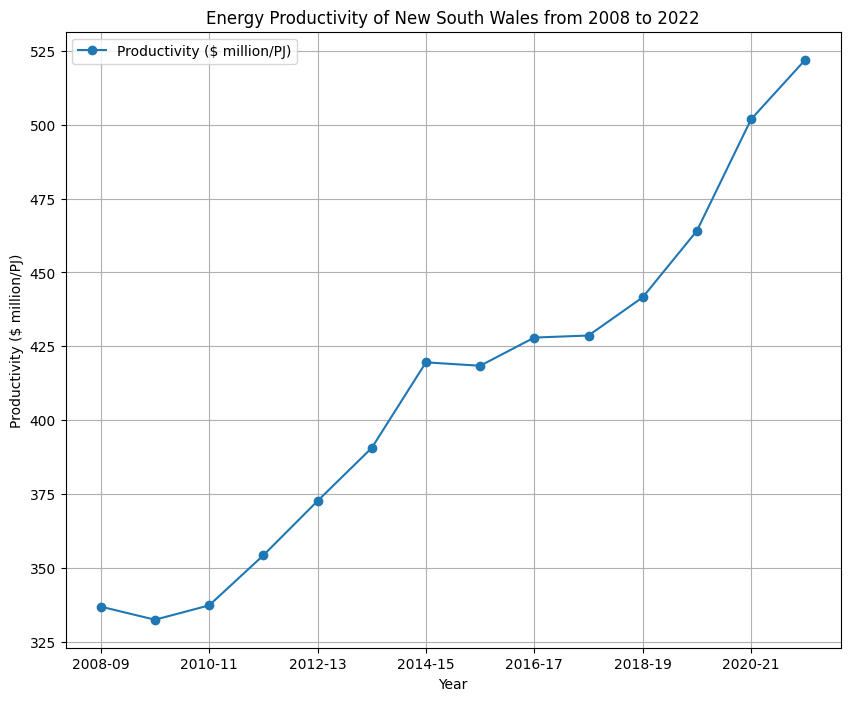

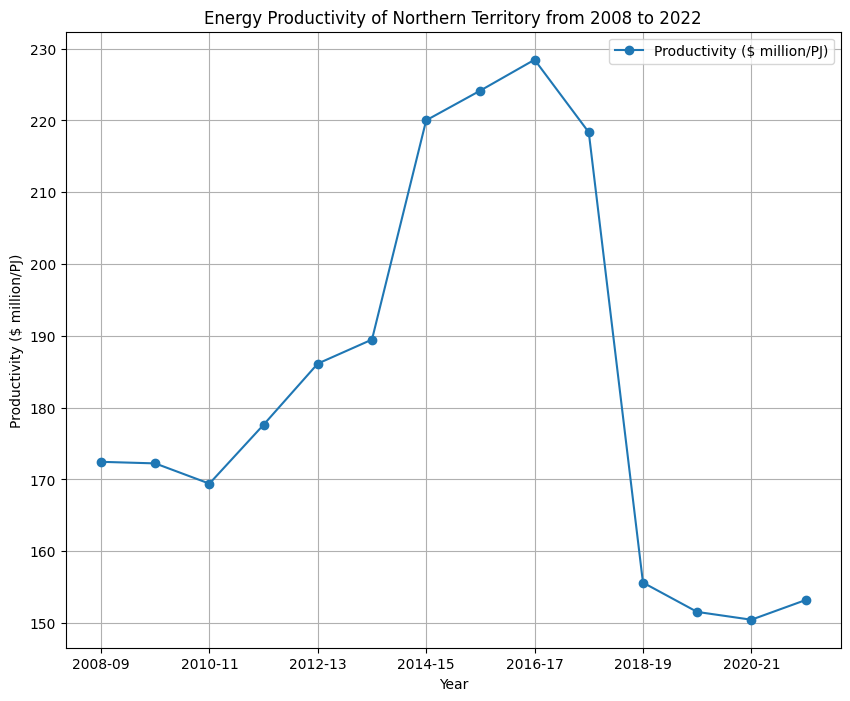

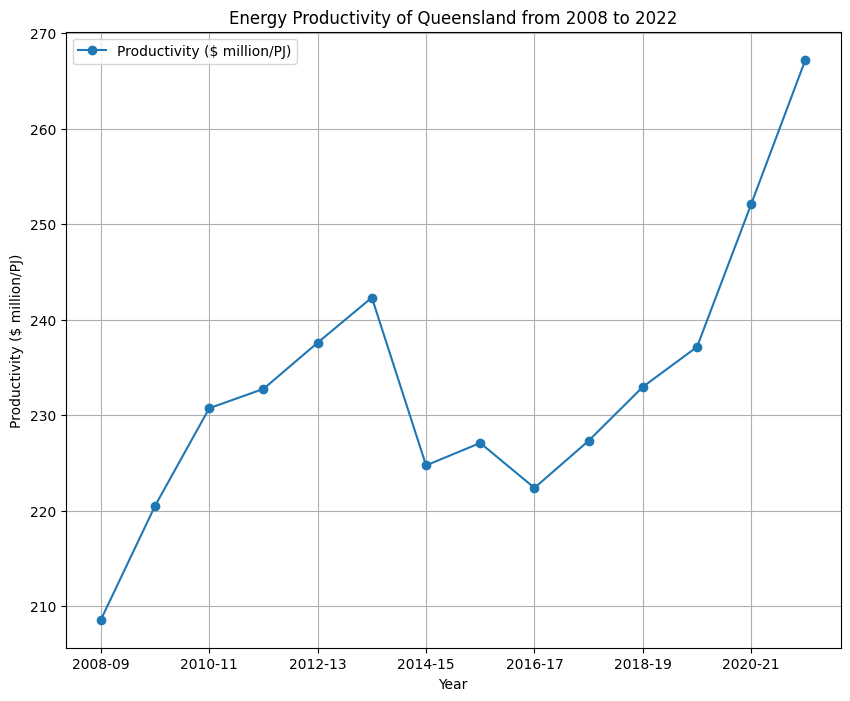

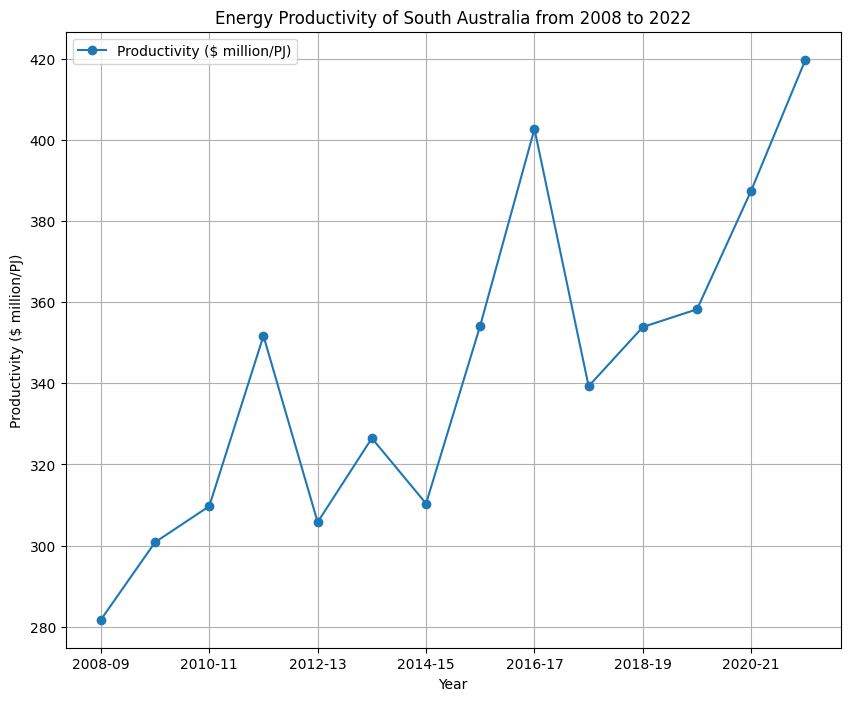

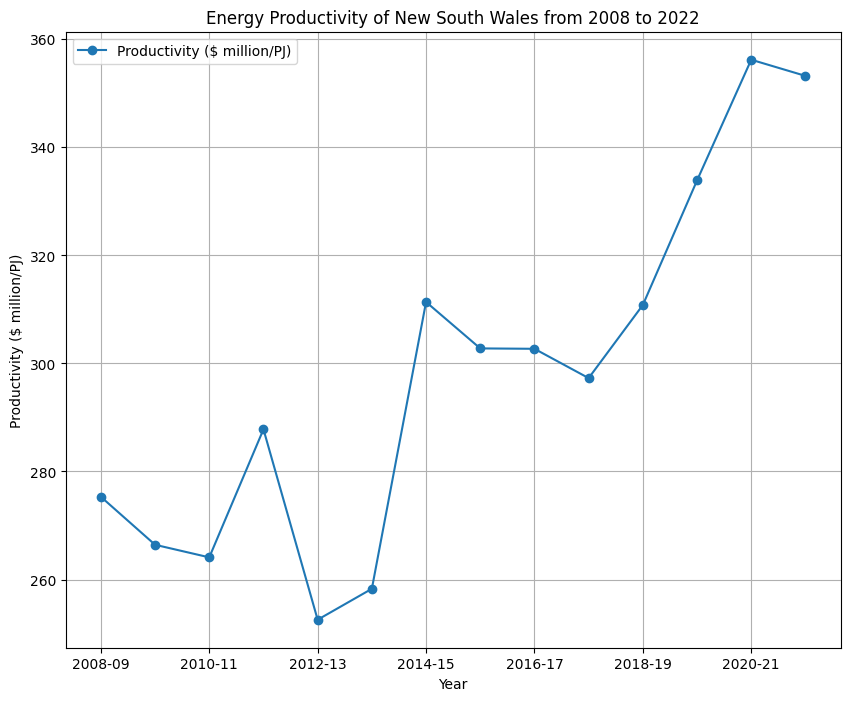

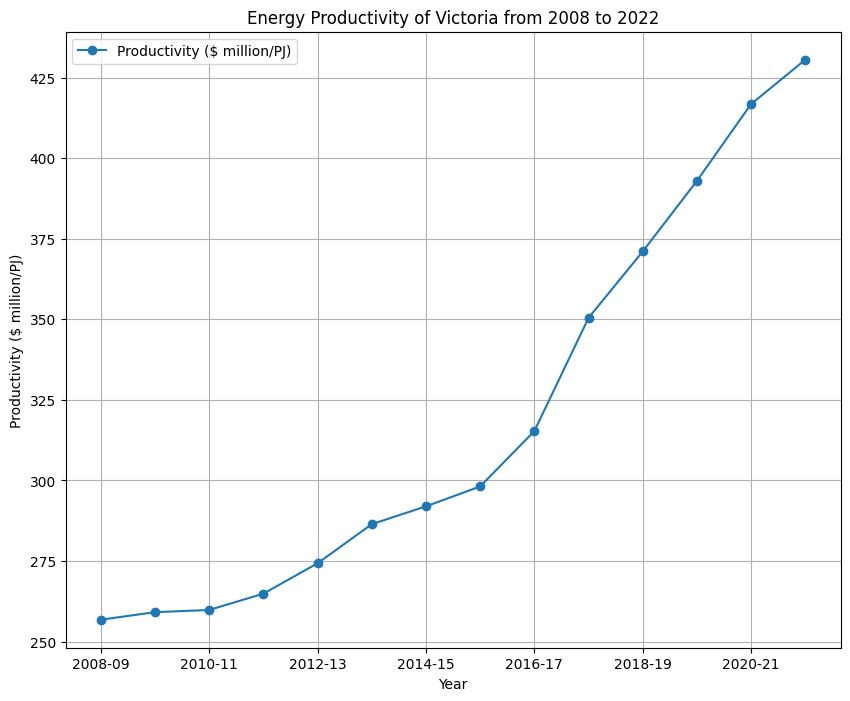

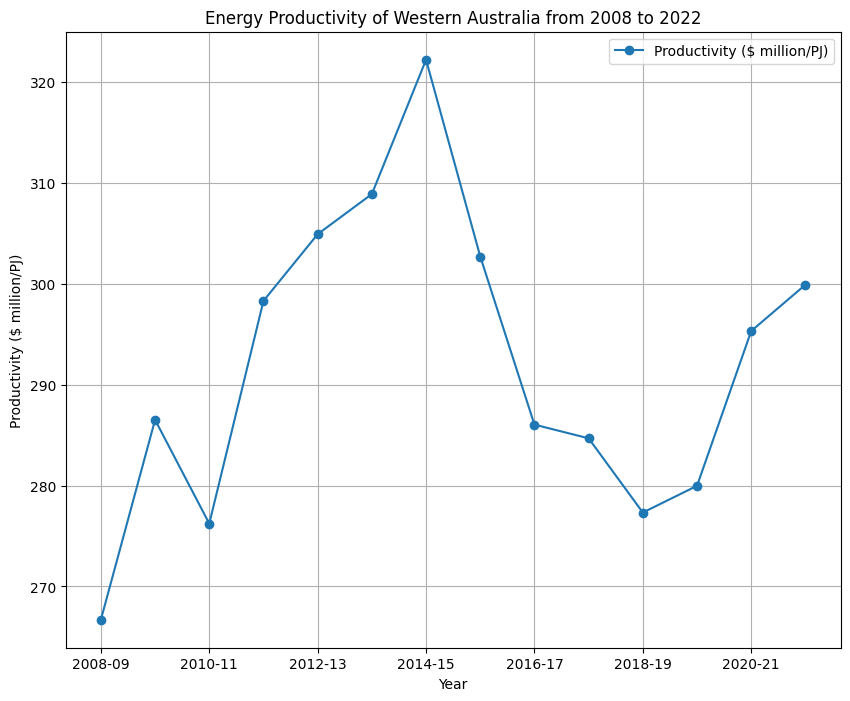

In [ ]:
#Question B7: Determine energy productivity, defined as Gross State Product (GSP) per unit of energy consumed, for each state annually and visualize the results.
#Create a line chart for the energy productivity of New South Wales
productivity_nsw_df.plot(kind='line', figsize=(10, 8), marker='o', linestyle='-')
plt.title(f'Energy Productivity of New South Wales from 2008 to 2022')
plt.xlabel('Year')
plt.ylabel(f'Productivity ($ million/PJ)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

#Create a line chart for the energy productivity of Northern Territory
productivity_nt_df.plot(kind='line', figsize=(10, 8), marker='o', linestyle='-')
plt.title(f'Energy Productivity of Northern Territory from 2008 to 2022')
plt.xlabel('Year')
plt.ylabel(f'Productivity ($ million/PJ)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

#Create a line chart for the energy productivity of Queensland
productivity_qld_df.plot(kind='line', figsize=(10, 8), marker='o', linestyle='-')
plt.title(f'Energy Productivity of Queensland from 2008 to 2022')
plt.xlabel('Year')
plt.ylabel(f'Productivity ($ million/PJ)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

#Create a line chart for the energy productivity of South Australia
productivity_sa_df.plot(kind='line', figsize=(10, 8), marker='o', linestyle='-')
plt.title(f'Energy Productivity of South Australia from 2008 to 2022')
plt.xlabel('Year')
plt.ylabel(f'Productivity ($ million/PJ)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

#Create a line chart for the energy productivity of Tasmania
productivity_tas_df.plot(kind='line', figsize=(10, 8), marker='o', linestyle='-')
plt.title(f'Energy Productivity of New South Wales from 2008 to 2022')
plt.xlabel('Year')
plt.ylabel(f'Productivity ($ million/PJ)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

#Create a line chart for the energy productivity of Victoria
productivity_vic_df.plot(kind='line', figsize=(10, 8), marker='o', linestyle='-')
plt.title(f'Energy Productivity of Victoria from 2008 to 2022')
plt.xlabel('Year')
plt.ylabel(f'Productivity ($ million/PJ)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

#Create a line chart for the energy productivity of Western Australia
productivity_wa_df.plot(kind='line', figsize=(10, 8), marker='o', linestyle='-')
plt.title(f'Energy Productivity of Western Australia from 2008 to 2022')
plt.xlabel('Year')
plt.ylabel(f'Productivity ($ million/PJ)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

This approach creates 7 separate line chart for 7 states, which cause unnecessary difficulties in comparing and analysing data. So, another way to address this question by treating all states in one unique dataframe.

In [ ]:
#Question B7 in 1 chart
#drop irrelevant columns and make a new dataframe without that irrelevant column
b7_AUSenergy_df = AUSenergy_df.drop(columns=['Population'])

#compute the energy productivity as the formula and input in a new column named 'Productivity ($ million/PJ)'
b7_AUSenergy_df['Productivity ($ million/PJ)'] = b7_AUSenergy_df['GSP ($ million)'] / (b7_AUSenergy_df['Coal (PJ)'] + b7_AUSenergy_df['Oil (PJ)'] + b7_AUSenergy_df['Gas (PJ)'] + b7_AUSenergy_df['Renewables (PJ)'])

#drop columns unnecessary for the visualization
b7_productivity_df = b7_AUSenergy_df.drop(columns=['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)','GSP ($ million)'])

#display dataframe to verify
(b7_productivity_df)

,Year,State,Productivity ($ million/PJ)
0,2008-09,WA,266.697548
1,2008-09,NSW,336.909888
2,2008-09,VIC,256.795792
3,2008-09,QLD,208.596774
4,2008-09,SA,281.704162
...,...,...,...
93,2021-22,VIC,430.548393
94,2021-22,QLD,267.205003
95,2021-22,SA,419.770270
96,2021-22,TAS,353.233879


To get 7 lines in 1 unique line chart, it is necessary to create 7 dataframes by filtering by 'State' from the mentioned dataframe 'b7_productivity_df' and after that plotting each line for each of 7 newly generated dataframe in the same line chart.

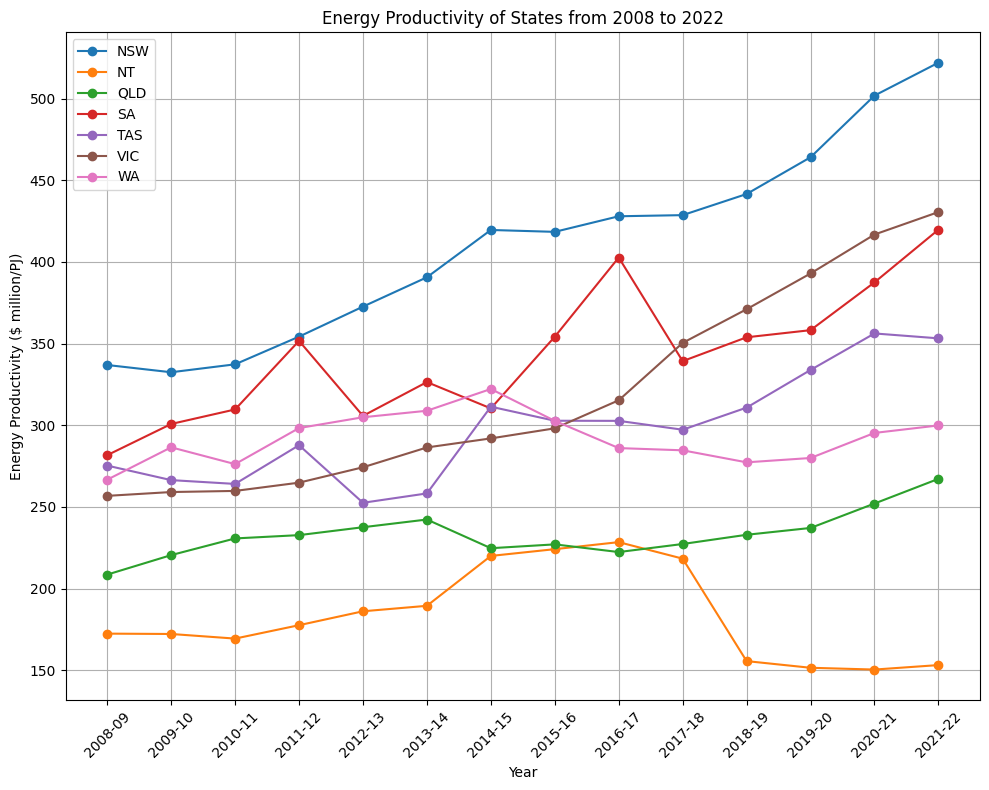

In [ ]:
#Question B7 in 1 chart
#create a line chart for the energy productivity of all states
#prepare the data for each state
b7_nsw_data = b7_productivity_df[b7_productivity_df['State'] == 'NSW']
b7_nt_data = b7_productivity_df[b7_productivity_df['State'] == 'NT']
b7_qld_data = b7_productivity_df[b7_productivity_df['State'] == 'QLD']
b7_sa_data = b7_productivity_df[b7_productivity_df['State'] == 'SA']
b7_tas_data = b7_productivity_df[b7_productivity_df['State'] == 'TAS']
b7_vic_data = b7_productivity_df[b7_productivity_df['State'] == 'VIC']
b7_wa_data = b7_productivity_df[b7_productivity_df['State'] == 'WA']

#visualize 7 lines for 7 states in 1 line chart
plt.figure(figsize=(10, 8))
plt.plot(b7_nsw_data['Year'], b7_nsw_data['Productivity ($ million/PJ)'], marker='o', label='NSW')
plt.plot(b7_nt_data['Year'], b7_nt_data['Productivity ($ million/PJ)'], marker='o', label='NT')
plt.plot(b7_qld_data['Year'], b7_qld_data['Productivity ($ million/PJ)'], marker='o', label='QLD')
plt.plot(b7_sa_data['Year'], b7_sa_data['Productivity ($ million/PJ)'], marker='o', label='SA')
plt.plot(b7_tas_data['Year'], b7_tas_data['Productivity ($ million/PJ)'], marker='o', label='TAS')
plt.plot(b7_vic_data['Year'], b7_vic_data['Productivity ($ million/PJ)'], marker='o', label='VIC')
plt.plot(b7_wa_data['Year'], b7_wa_data['Productivity ($ million/PJ)'], marker='o', label='WA')
plt.title('Energy Productivity of States from 2008 to 2022')
plt.xlabel('Year')
plt.ylabel('Energy Productivity ($ million/PJ)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

When all the states are in 1 chart with this approach, it displays an evidently better visualization for data comparison and analysis.

##Data Visualization 7: Analyse the energy intensity for each state annually and chart these figures. (Question C8)

Like Question B7, there are 2 ways to visualize this question. Let's go with both ways for this question.

The formula to compute the Annual Energy Intensity of each state is as following:

***Energy Intensity (GJ/$  million) = Total Annual Energy Consumption (PJ) * 1000 / GSP ($ million) ***

Based on this formula, a code is applied to compute the Yearly Energy Intensity of each state and put the result in the relevant column named 'Intensity (GJ/$ million)' of the relevant dataframe.

In [ ]:
#Question C8: Analyse the energy intensity, defined as energy consumption per unit of GSP, for each state annually and chart these figures.
#split into 1 separate dataframe for each state
c8_nsw_df = AUSenergy_df[AUSenergy_df['State'] == 'NSW'].reset_index(drop=True)
c8_nt_df = AUSenergy_df[AUSenergy_df['State'] == 'NT'].reset_index(drop=True)
c8_qld_df = AUSenergy_df[AUSenergy_df['State'] == 'QLD'].reset_index(drop=True)
c8_sa_df = AUSenergy_df[AUSenergy_df['State'] == 'SA'].reset_index(drop=True)
c8_tas_df = AUSenergy_df[AUSenergy_df['State'] == 'TAS'].reset_index(drop=True)
c8_vic_df = AUSenergy_df[AUSenergy_df['State'] == 'VIC'].reset_index(drop=True)
c8_wa_df = AUSenergy_df[AUSenergy_df['State'] == 'WA'].reset_index(drop=True)

#compute the energy intensity
c8_nsw_df['Intensity (GJ/$ million)'] = (c8_nsw_df['Coal (PJ)'] + c8_nsw_df['Oil (PJ)'] + c8_nsw_df['Gas (PJ)'] + c8_nsw_df['Renewables (PJ)']) * 1000 / c8_nsw_df['GSP ($ million)']
c8_nt_df['Intensity (GJ/$ million)'] = (c8_nt_df['Coal (PJ)'] + c8_nt_df['Oil (PJ)'] + c8_nt_df['Gas (PJ)'] + c8_nt_df['Renewables (PJ)']) * 1000 / c8_nt_df['GSP ($ million)']
c8_qld_df['Intensity (GJ/$ million)'] = (c8_qld_df['Coal (PJ)'] + c8_qld_df['Oil (PJ)'] + c8_qld_df['Gas (PJ)'] + c8_qld_df['Renewables (PJ)']) * 1000 / c8_qld_df['GSP ($ million)']
c8_sa_df['Intensity (GJ/$ million)'] = (c8_sa_df['Coal (PJ)'] + c8_sa_df['Oil (PJ)'] + c8_sa_df['Gas (PJ)'] + c8_sa_df['Renewables (PJ)']) * 1000 / c8_sa_df['GSP ($ million)']
c8_tas_df['Intensity (GJ/$ million)'] = (c8_tas_df['Coal (PJ)'] + c8_tas_df['Oil (PJ)'] + c8_tas_df['Gas (PJ)'] + c8_tas_df['Renewables (PJ)']) * 1000 / c8_tas_df['GSP ($ million)']
c8_vic_df['Intensity (GJ/$ million)'] = (c8_vic_df['Coal (PJ)'] + c8_vic_df['Oil (PJ)'] + c8_vic_df['Gas (PJ)'] + c8_vic_df['Renewables (PJ)']) * 1000 / c8_vic_df['GSP ($ million)']
c8_wa_df['Intensity (GJ/$ million)'] = (c8_wa_df['Coal (PJ)'] + c8_wa_df['Oil (PJ)'] + c8_wa_df['Gas (PJ)'] + c8_wa_df['Renewables (PJ)']) * 1000 / c8_wa_df['GSP ($ million)']

#drop irrelevant columns - formula from chatgpt
intensity_nsw_df = c8_nsw_df.drop(columns=['State', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)','Population', 'GSP ($ million)'])
intensity_nt_df = c8_nt_df.drop(columns=['State', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)','Population', 'GSP ($ million)'])
intensity_qld_df = c8_qld_df.drop(columns=['State', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)','Population', 'GSP ($ million)'])
intensity_sa_df = c8_sa_df.drop(columns=['State', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)','Population', 'GSP ($ million)'])
intensity_tas_df = c8_tas_df.drop(columns=['State', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)','Population', 'GSP ($ million)'])
intensity_vic_df = c8_vic_df.drop(columns=['State', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)','Population', 'GSP ($ million)'])
intensity_wa_df = c8_wa_df.drop(columns=['State', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)','Population', 'GSP ($ million)'])

#set index Year
intensity0_nsw_df = intensity_nsw_df.set_index('Year', inplace=True)
intensity0_nt_df = intensity_nt_df.set_index('Year', inplace=True)
intensity0_qld_df = intensity_qld_df.set_index('Year', inplace=True)
intensity0_sa_df = intensity_sa_df.set_index('Year', inplace=True)
intensity0_tas_df = intensity_tas_df.set_index('Year', inplace=True)
intensity0_vic_df = intensity_vic_df.set_index('Year', inplace=True)
intensity0_wa_df = intensity_wa_df.set_index('Year', inplace=True)

(intensity_nt_df)

,Intensity (GJ/$ million)
Year,
2008-09,5.798719
2009-10,5.806093
2010-11,5.902752
2011-12,5.630086
2012-13,5.372487
2013-14,5.277530
2014-15,4.544994
2015-16,4.460948
2016-17,4.377084


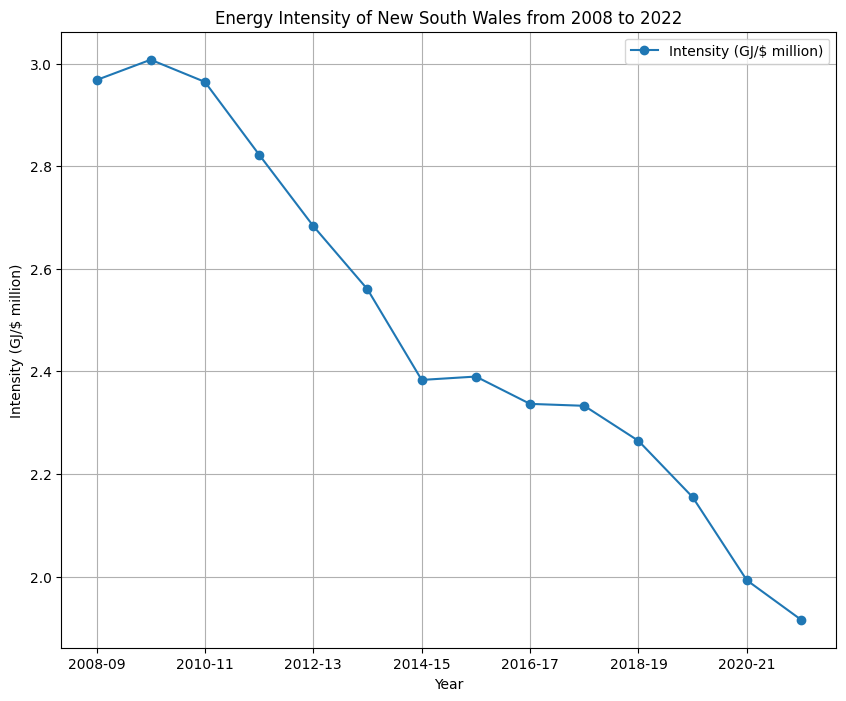

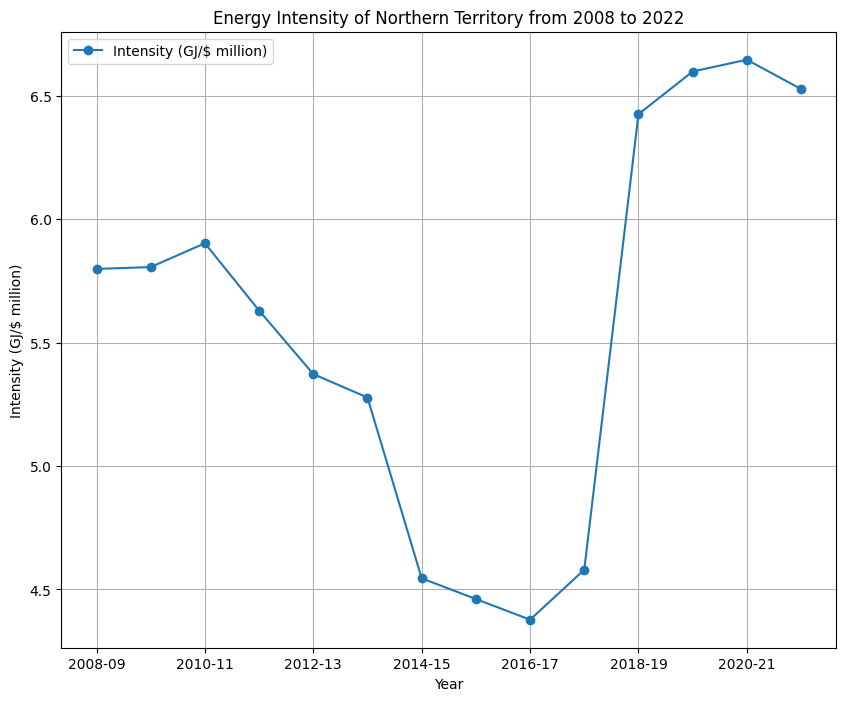

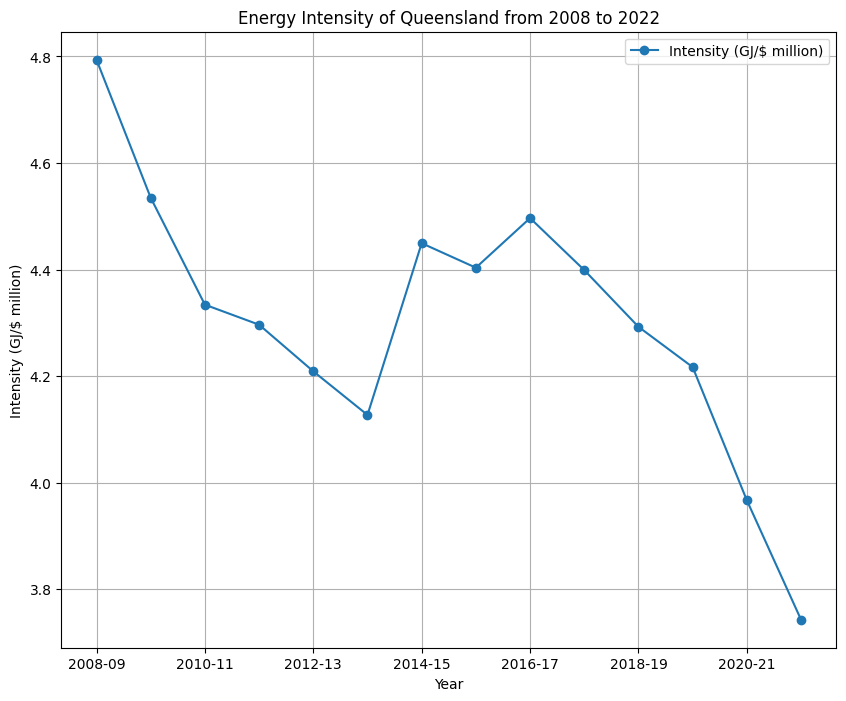

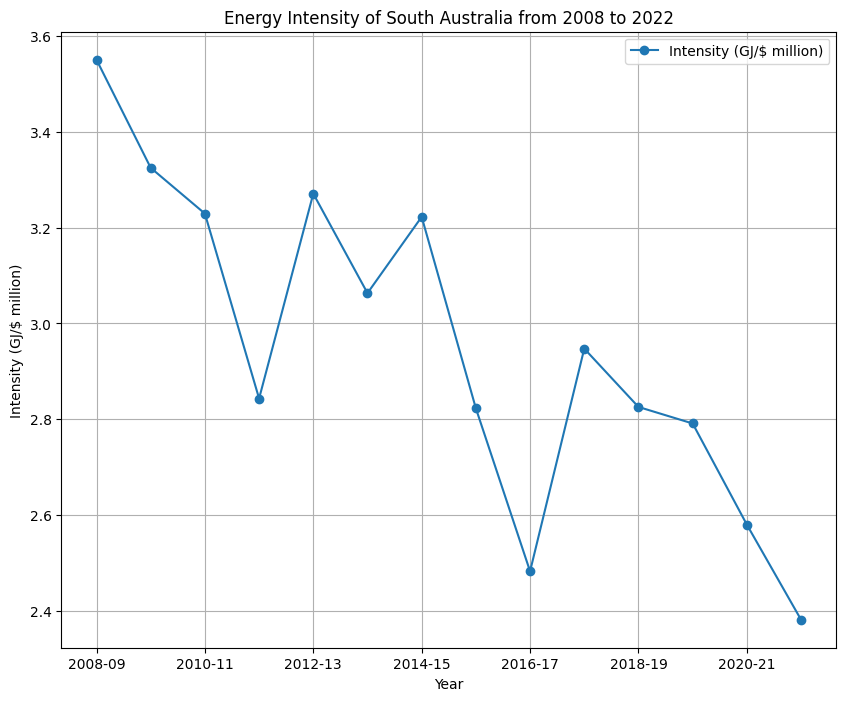

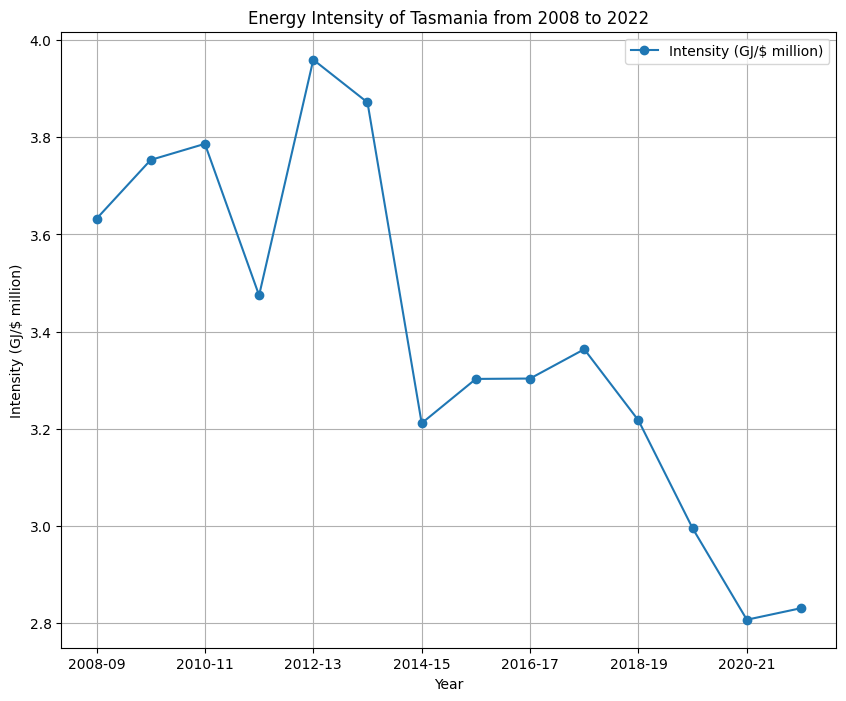

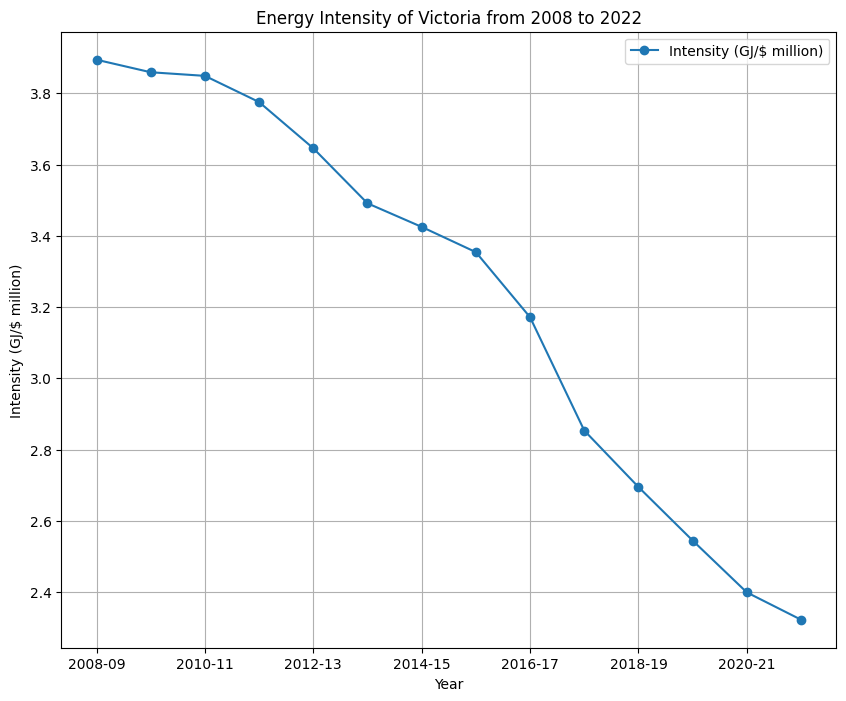

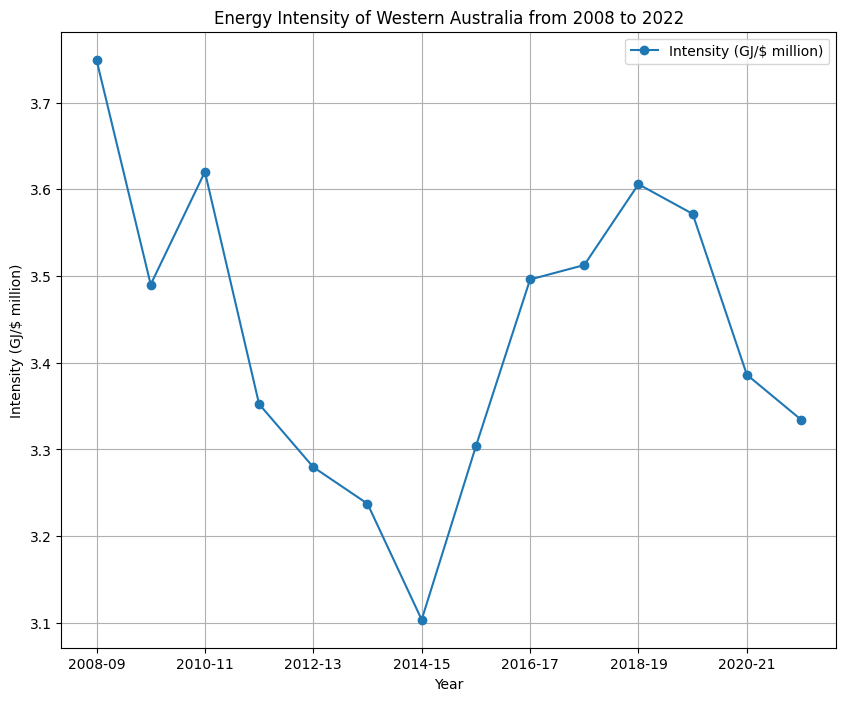

In [ ]:
#Question C8: Analyse the energy intensity, defined as energy consumption per unit of GSP, for each state annually and chart these figures.
#Create a line chart for the energy intensity of New South Wales
intensity_nsw_df.plot(kind='line', figsize=(10, 8), marker='o', linestyle='-')
plt.title(f'Energy Intensity of New South Wales from 2008 to 2022')
plt.xlabel('Year')
plt.ylabel(f'Intensity (GJ/$ million)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

#Create a line chart for the energy intensity of Northern Territory
intensity_nt_df.plot(kind='line', figsize=(10, 8), marker='o', linestyle='-')
plt.title(f'Energy Intensity of Northern Territory from 2008 to 2022')
plt.xlabel('Year')
plt.ylabel(f'Intensity (GJ/$ million)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

#Create a line chart for the energy intensity of Queensland
intensity_qld_df.plot(kind='line', figsize=(10, 8), marker='o', linestyle='-')
plt.title(f'Energy Intensity of Queensland from 2008 to 2022')
plt.xlabel('Year')
plt.ylabel(f'Intensity (GJ/$ million)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

#Create a line chart for the energy intensity of South Australia
intensity_sa_df.plot(kind='line', figsize=(10, 8), marker='o', linestyle='-')
plt.title(f'Energy Intensity of South Australia from 2008 to 2022')
plt.xlabel('Year')
plt.ylabel(f'Intensity (GJ/$ million)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

#Create a line chart for the energy intensity of Tasmania
intensity_tas_df.plot(kind='line', figsize=(10, 8), marker='o', linestyle='-')
plt.title(f'Energy Intensity of Tasmania from 2008 to 2022')
plt.xlabel('Year')
plt.ylabel(f'Intensity (GJ/$ million)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

#Create a line chart for the energy intensity of Victoria
intensity_vic_df.plot(kind='line', figsize=(10, 8), marker='o', linestyle='-')
plt.title(f'Energy Intensity of Victoria from 2008 to 2022')
plt.xlabel('Year')
plt.ylabel(f'Intensity (GJ/$ million)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

#Create a line chart for the energy intensity of Western Australia
intensity_wa_df.plot(kind='line', figsize=(10, 8), marker='o', linestyle='-')
plt.title(f'Energy Intensity of Western Australia from 2008 to 2022')
plt.xlabel('Year')
plt.ylabel(f'Intensity (GJ/$ million)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Question C8 in 1 chart
#drop irrelevant column 'Population'
c8_AUSenergy_df = AUSenergy_df.drop(columns=['Population'])

#compute the Energy Intensity and add in a newly generated column named 'Intensity (GJ/$ million)'
c8_AUSenergy_df['Intensity (GJ/$ million)'] = (c8_AUSenergy_df['Coal (PJ)'] + c8_AUSenergy_df['Oil (PJ)'] + c8_AUSenergy_df['Gas (PJ)'] + c8_AUSenergy_df['Renewables (PJ)']) * 1000 / c8_AUSenergy_df['GSP ($ million)']

#drop columns unnecessary for visualization
c8_intensity_df = c8_AUSenergy_df.drop(columns=['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)','GSP ($ million)'])

#display dataframe to check
(c8_intensity_df)

,Year,State,Intensity (GJ/$ million)
0,2008-09,WA,3.749566
1,2008-09,NSW,2.968153
2,2008-09,VIC,3.894145
3,2008-09,QLD,4.793938
4,2008-09,SA,3.549823
...,...,...,...
93,2021-22,VIC,2.322619
94,2021-22,QLD,3.742445
95,2021-22,SA,2.382255
96,2021-22,TAS,2.830986


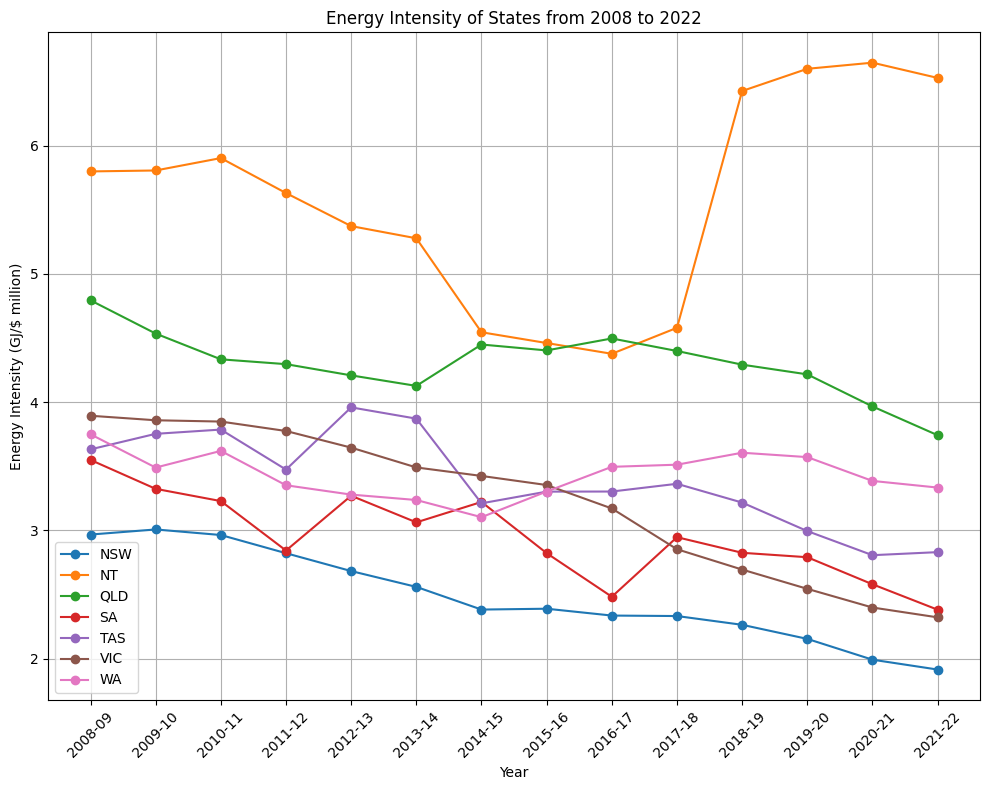

In [ ]:
#Question C8 in 1 chart
#create a line chart for the energy intensity of all states
#prepare the dataframe for each state
c8_nsw_data = c8_intensity_df[c8_intensity_df['State'] == 'NSW']
c8_nt_data = c8_intensity_df[c8_intensity_df['State'] == 'NT']
c8_qld_data = c8_intensity_df[c8_intensity_df['State'] == 'QLD']
c8_sa_data = c8_intensity_df[c8_intensity_df['State'] == 'SA']
c8_tas_data = c8_intensity_df[c8_intensity_df['State'] == 'TAS']
c8_vic_data = c8_intensity_df[c8_intensity_df['State'] == 'VIC']
c8_wa_data = c8_intensity_df[c8_intensity_df['State'] == 'WA']

#visualize 7 dataframes of 7 states in 1 line chart
plt.figure(figsize=(10, 8))
plt.plot(c8_nsw_data['Year'], c8_nsw_data['Intensity (GJ/$ million)'], marker='o', label='NSW')
plt.plot(c8_nt_data['Year'], c8_nt_data['Intensity (GJ/$ million)'], marker='o', label='NT')
plt.plot(c8_qld_data['Year'], c8_qld_data['Intensity (GJ/$ million)'], marker='o', label='QLD')
plt.plot(c8_sa_data['Year'], c8_sa_data['Intensity (GJ/$ million)'], marker='o', label='SA')
plt.plot(c8_tas_data['Year'], c8_tas_data['Intensity (GJ/$ million)'], marker='o', label='TAS')
plt.plot(c8_vic_data['Year'], c8_vic_data['Intensity (GJ/$ million)'], marker='o', label='VIC')
plt.plot(c8_wa_data['Year'], c8_wa_data['Intensity (GJ/$ million)'], marker='o', label='WA')
plt.title('Energy Intensity of States from 2008 to 2022')
plt.xlabel('Year')
plt.ylabel('Energy Intensity (GJ/$ million)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Data Visualization 8: Analyse and compare the growth rate of the GSP and the consumption of renewable energy for each state. (Question C9)

In [ ]:
#Question C9: Analyse and compare the growth rate of the GSP and the consumption of renewable energy for each state
#split into 1 separate dataframe for each state
c9_nsw_df = AUSenergy_df[AUSenergy_df['State'] == 'NSW'].reset_index(drop=True)
c9_nt_df = AUSenergy_df[AUSenergy_df['State'] == 'NT'].reset_index(drop=True)
c9_qld_df = AUSenergy_df[AUSenergy_df['State'] == 'QLD'].reset_index(drop=True)
c9_sa_df = AUSenergy_df[AUSenergy_df['State'] == 'SA'].reset_index(drop=True)
c9_tas_df = AUSenergy_df[AUSenergy_df['State'] == 'TAS'].reset_index(drop=True)
c9_vic_df = AUSenergy_df[AUSenergy_df['State'] == 'VIC'].reset_index(drop=True)
c9_wa_df = AUSenergy_df[AUSenergy_df['State'] == 'WA'].reset_index(drop=True)

#drop irrelevant columns
renewablesgsp_nsw_df = c9_nsw_df.drop(columns=['State','Population', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)'])
renewablesgsp_nt_df = c9_nt_df.drop(columns=['State','Population', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)'])
renewablesgsp_qld_df = c9_qld_df.drop(columns=['State','Population', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)'])
renewablesgsp_sa_df = c9_sa_df.drop(columns=['State','Population', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)'])
renewablesgsp_tas_df = c9_tas_df.drop(columns=['State','Population', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)'])
renewablesgsp_vic_df = c9_vic_df.drop(columns=['State','Population', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)'])
renewablesgsp_wa_df = c9_wa_df.drop(columns=['State','Population', 'Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)'])

#display a sample dataframe to check
(renewablesgsp_nt_df)

,Year,Renewables (PJ),GSP ($ million)
0,2008-09,0.4,19562
1,2009-10,0.5,19469
2,2010-11,0.5,20035
3,2011-12,0.5,20841
4,2012-13,0.5,22263
5,2013-14,0.6,22530
6,2014-15,0.6,22827
7,2015-16,0.7,23275
8,2016-17,0.8,23616
9,2017-18,1.0,24072


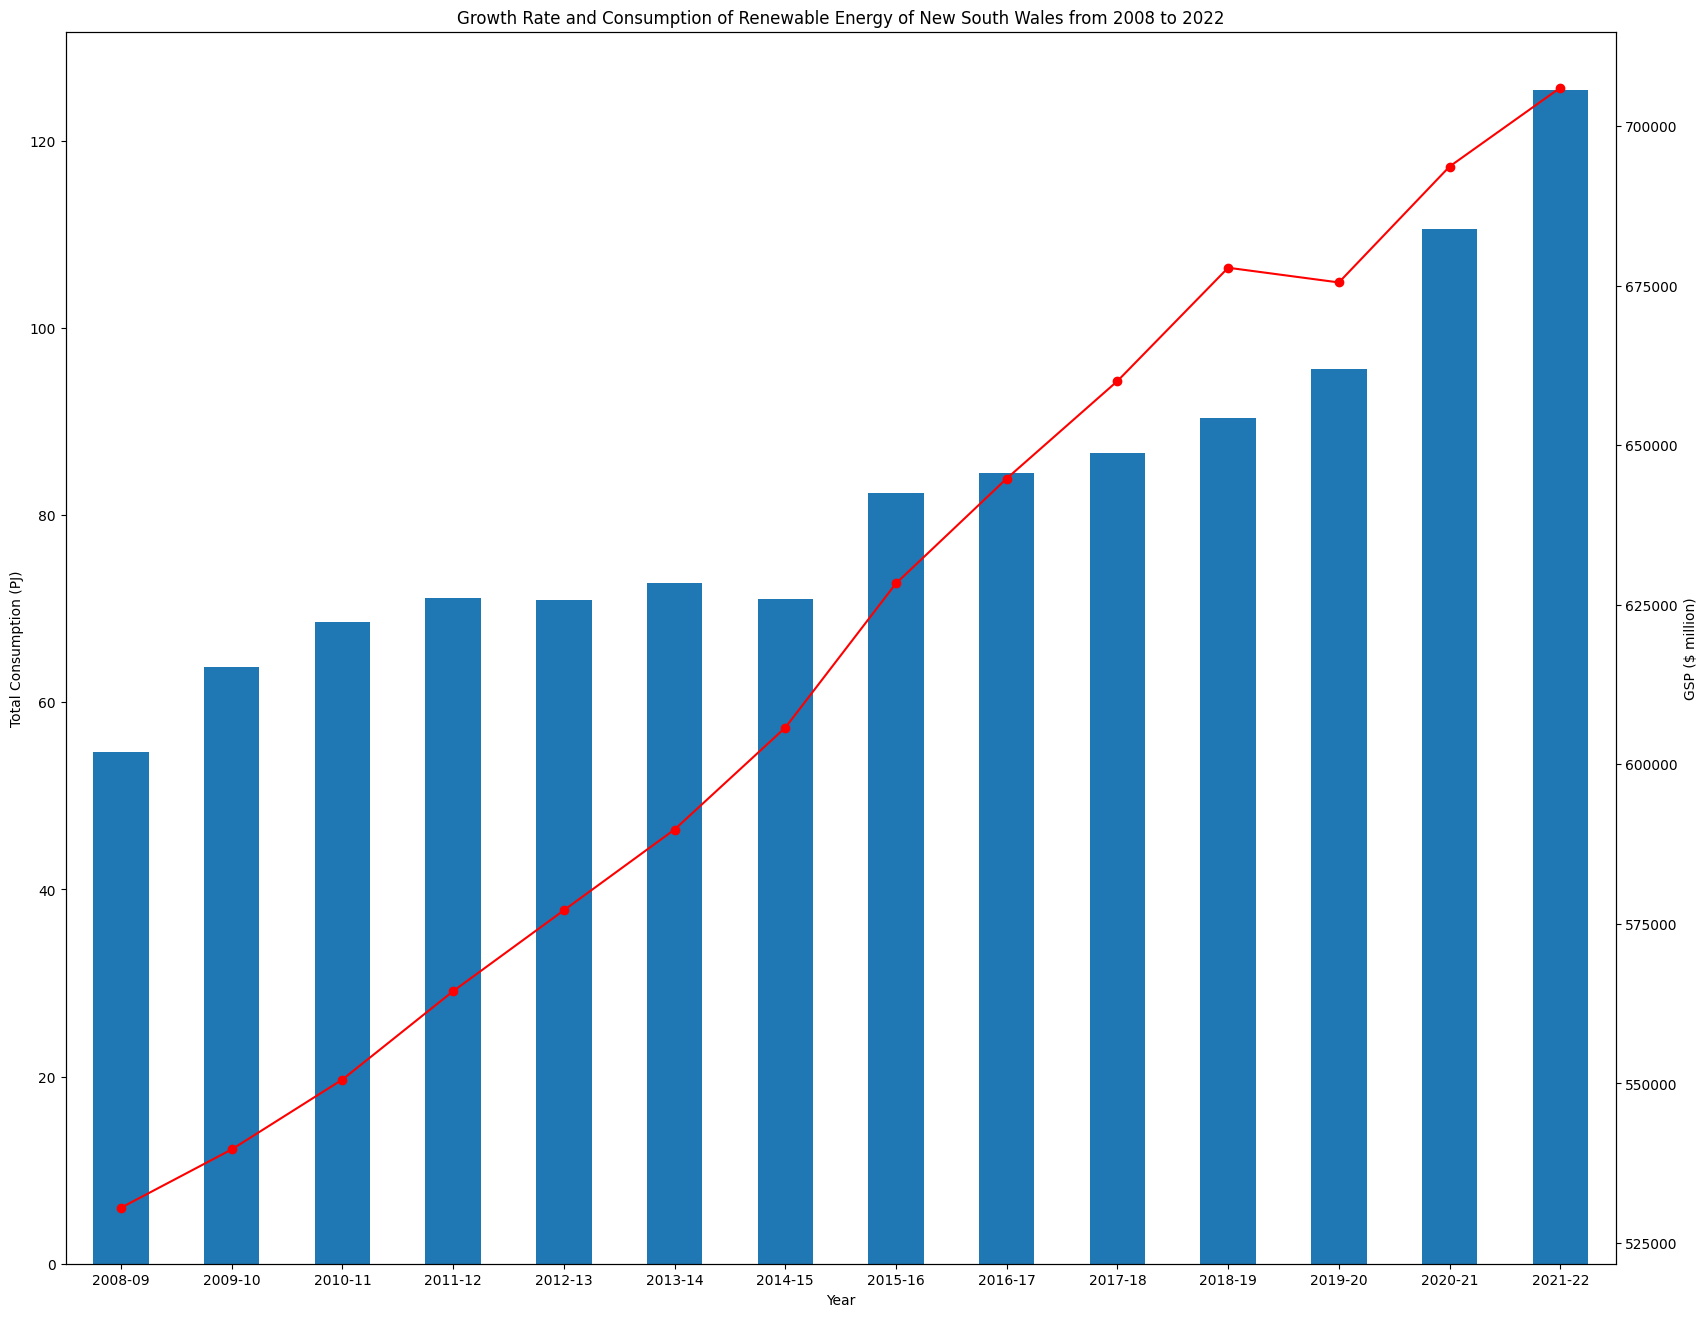

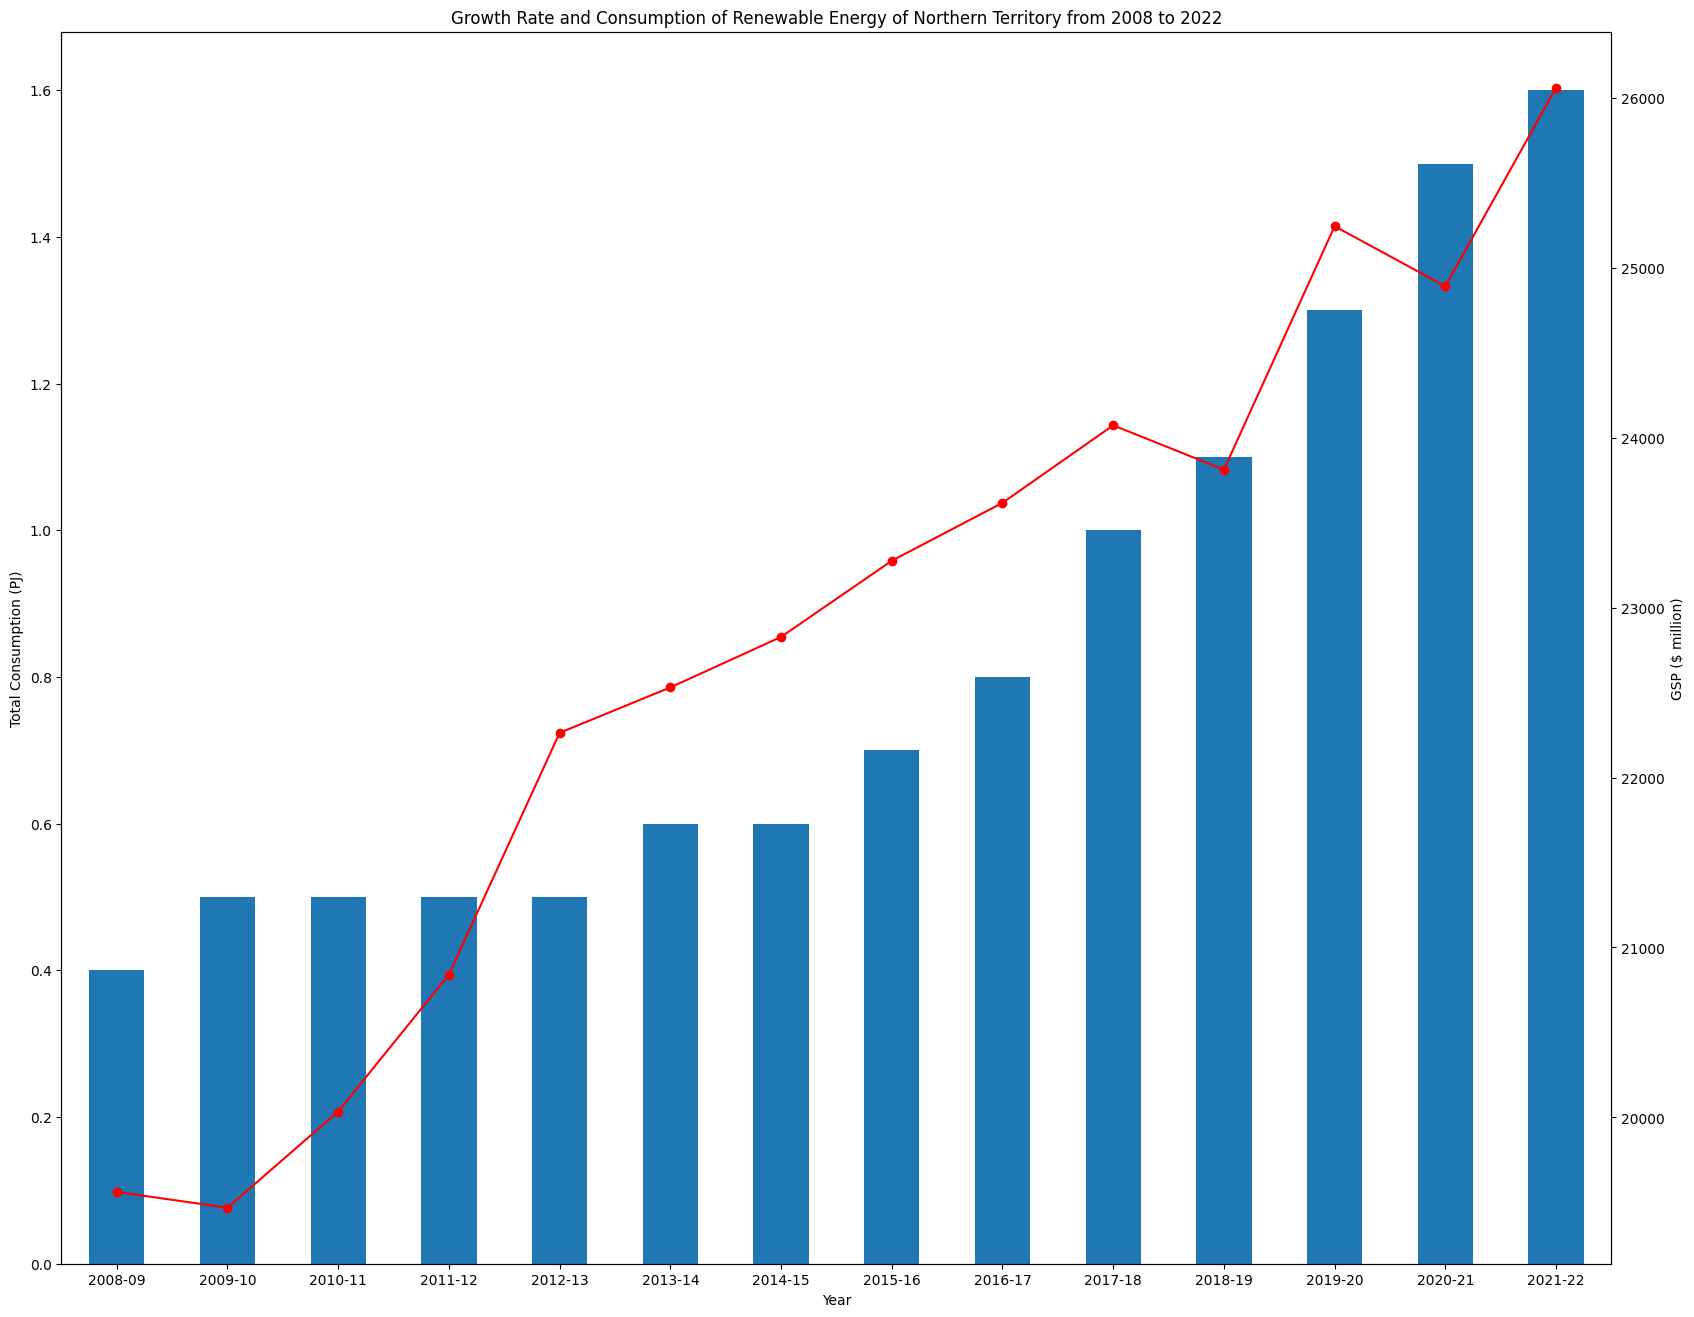

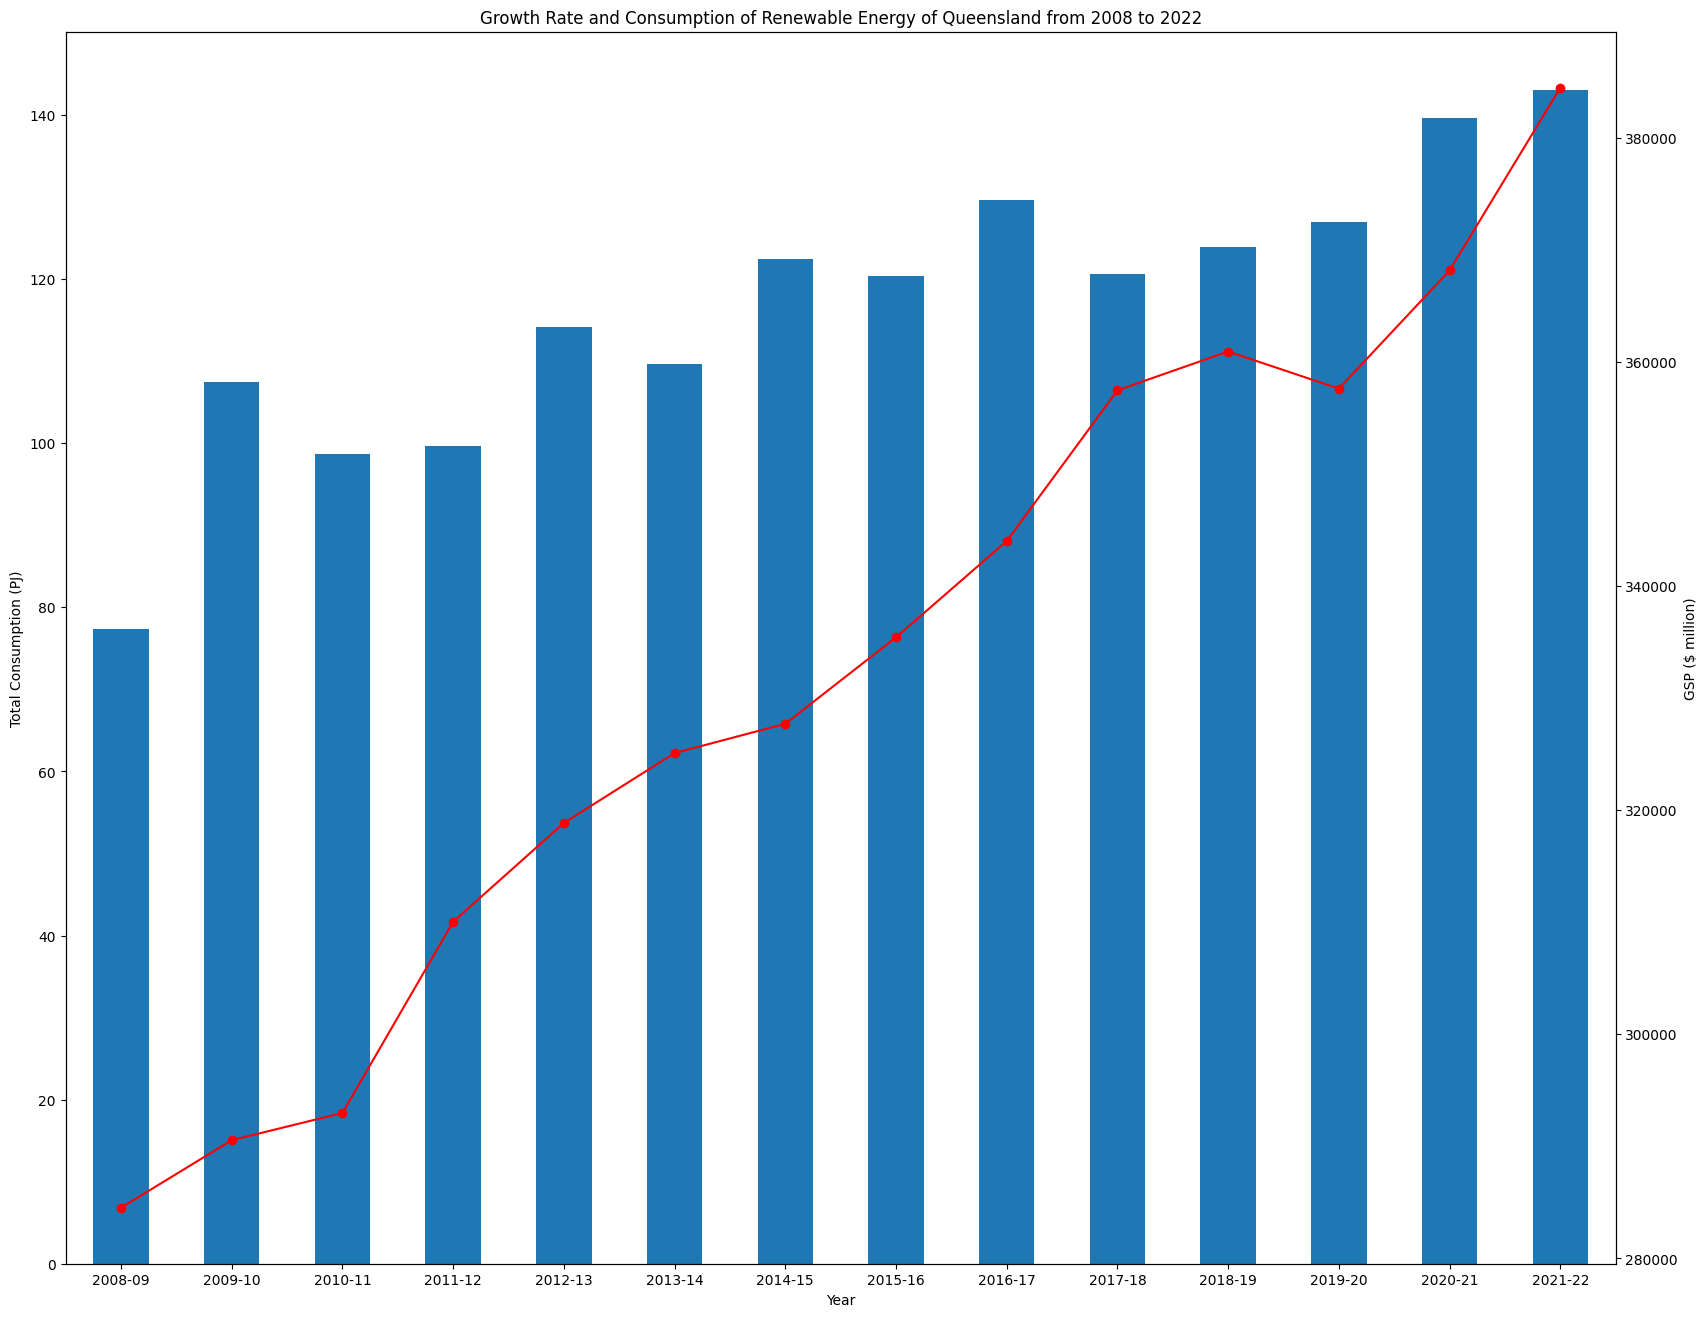

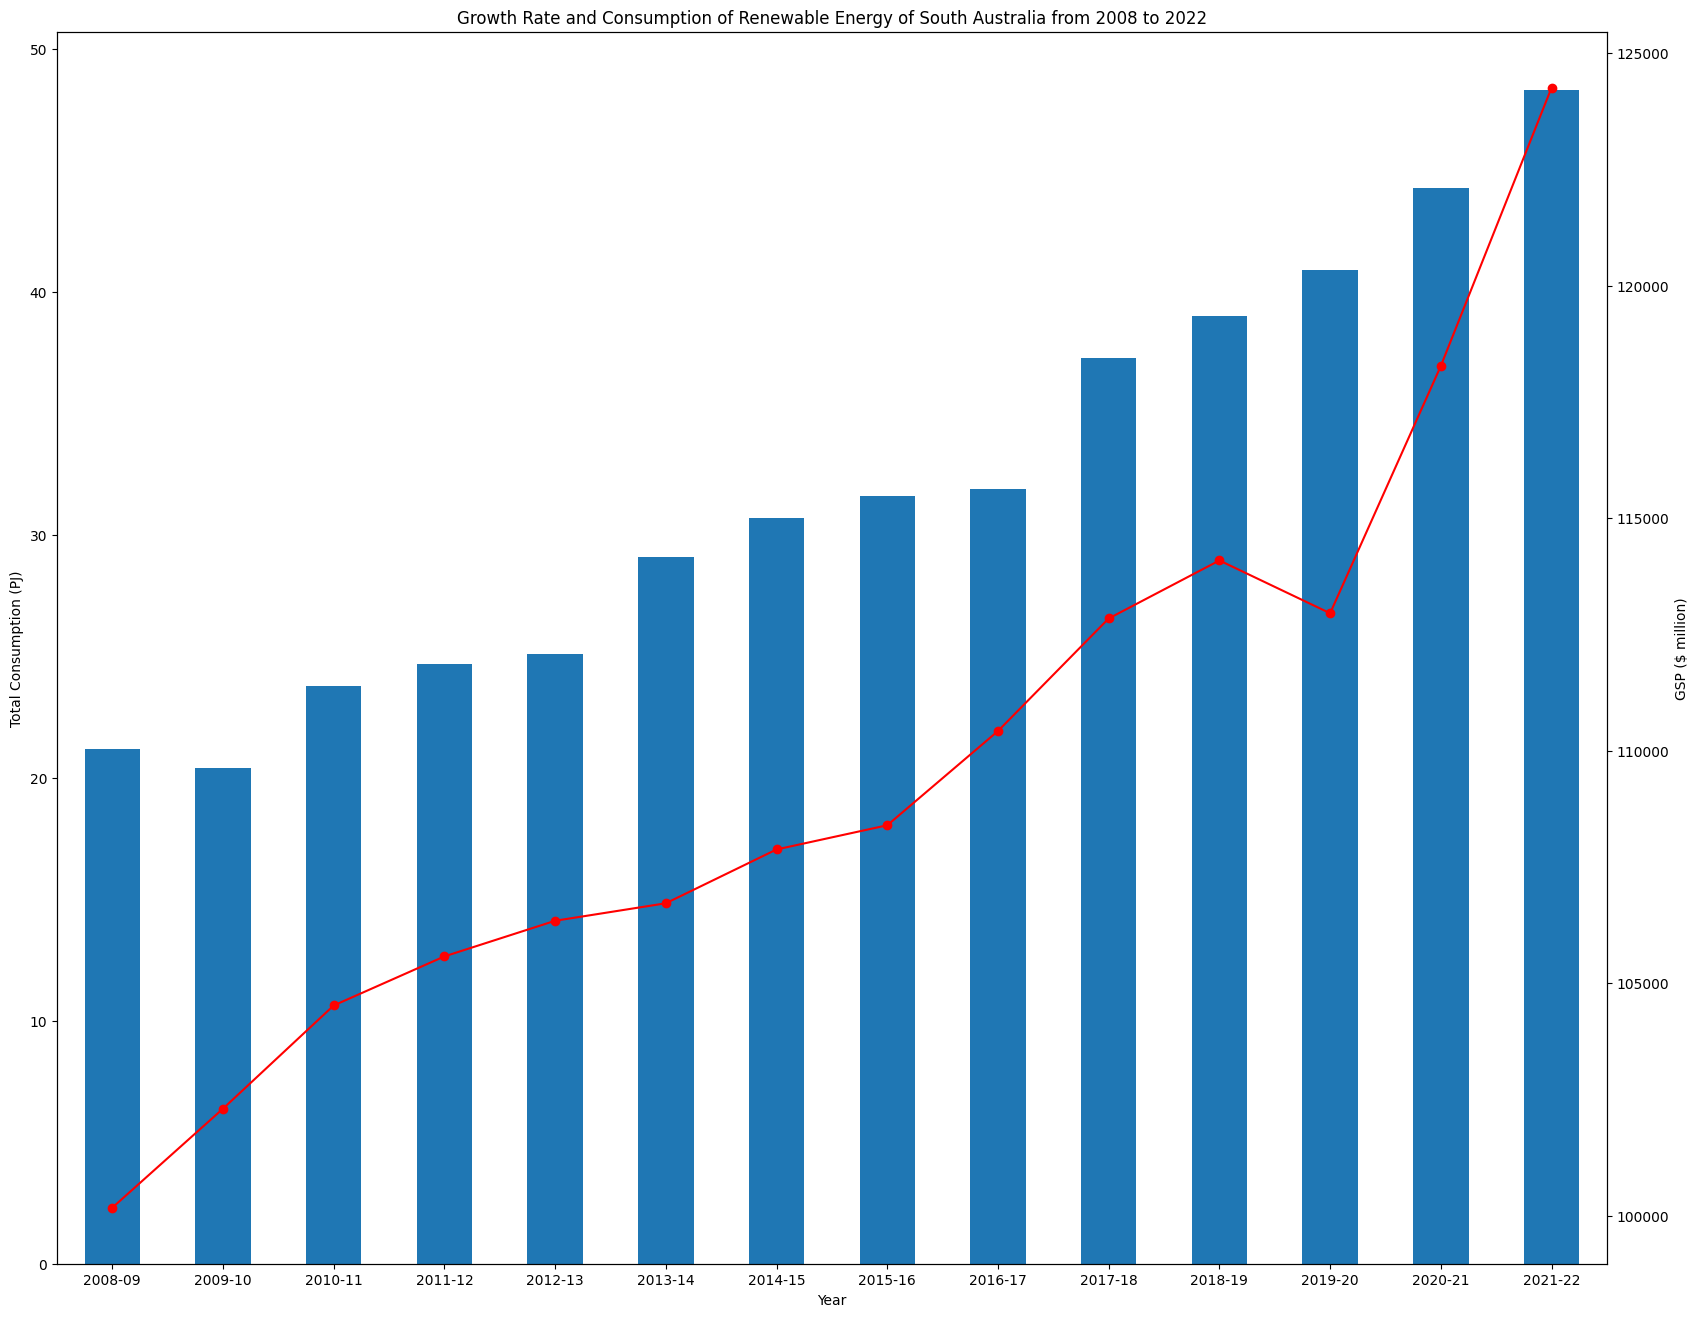

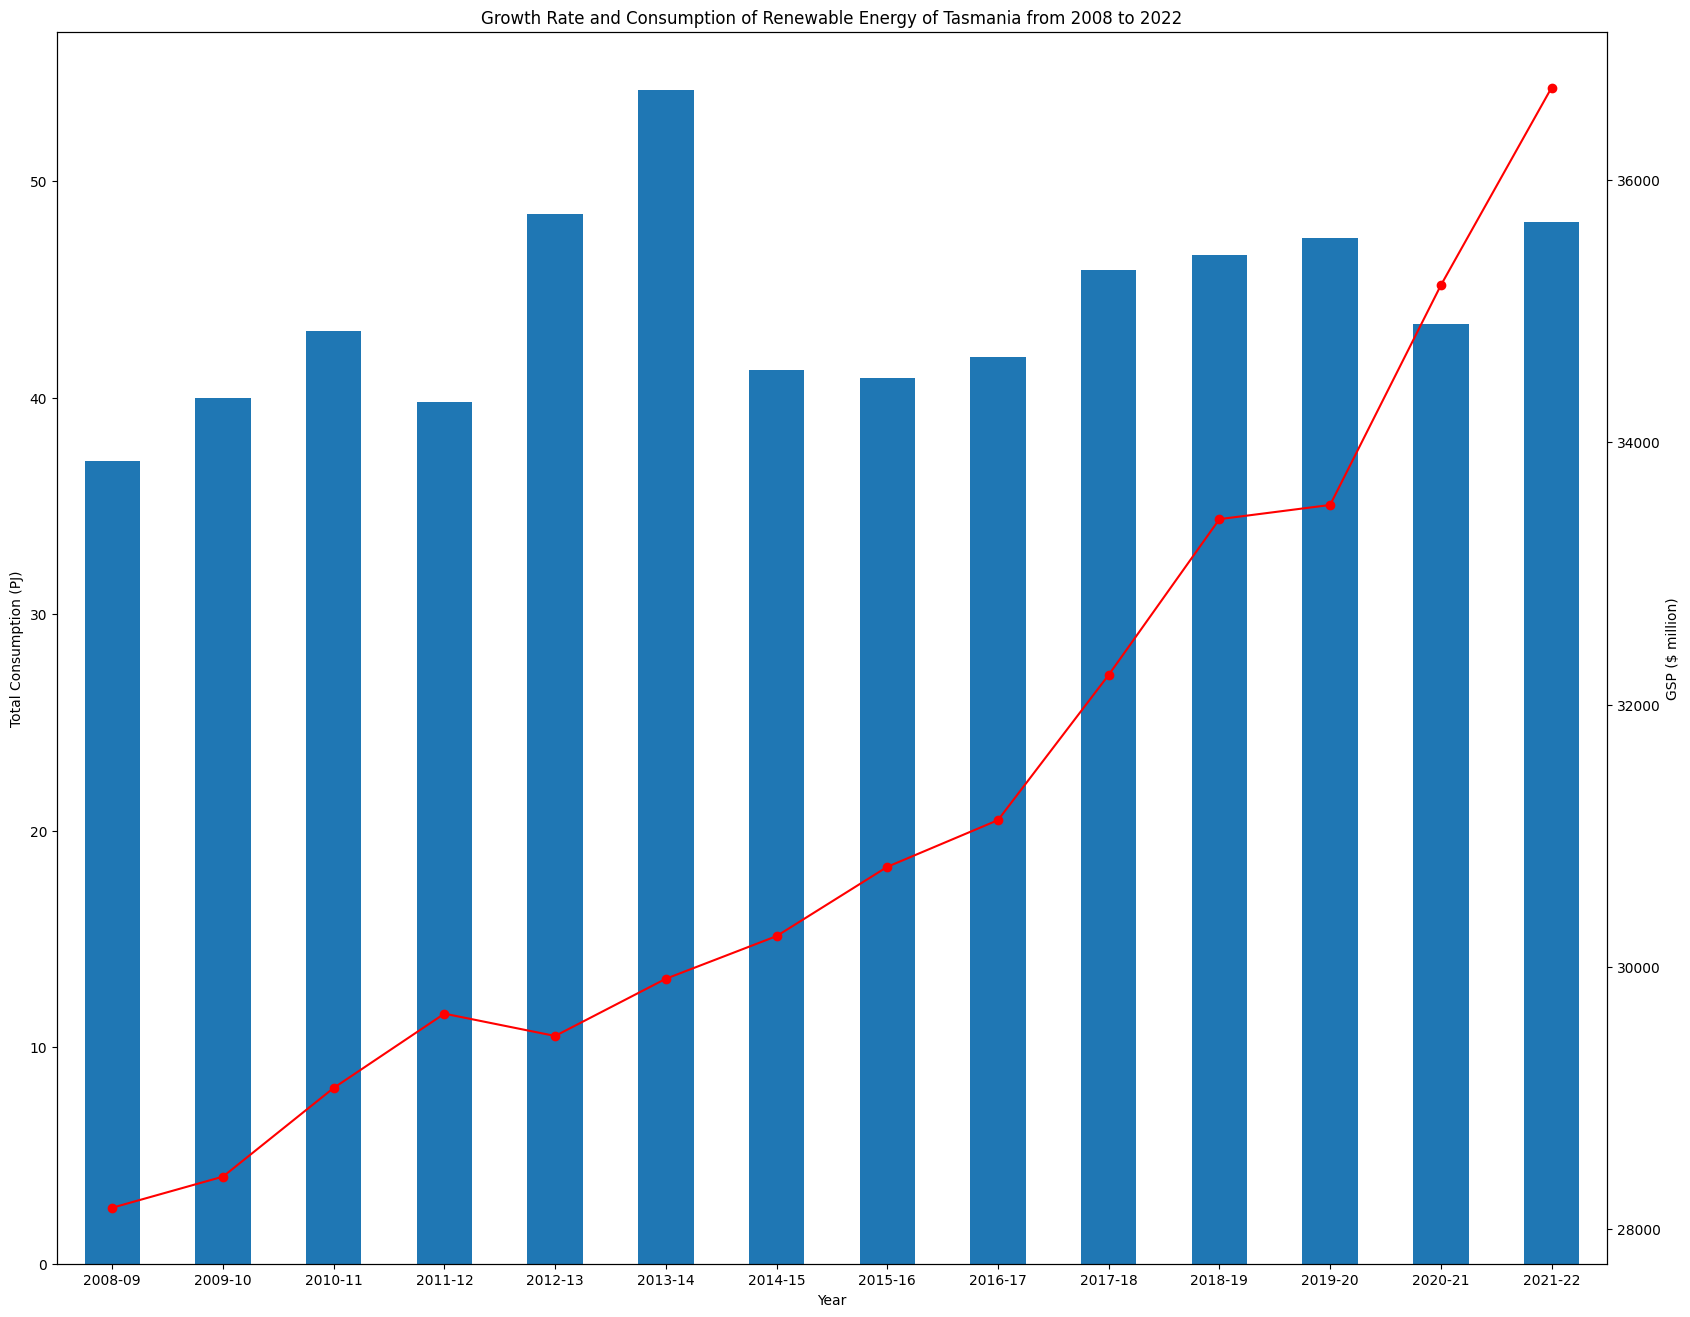

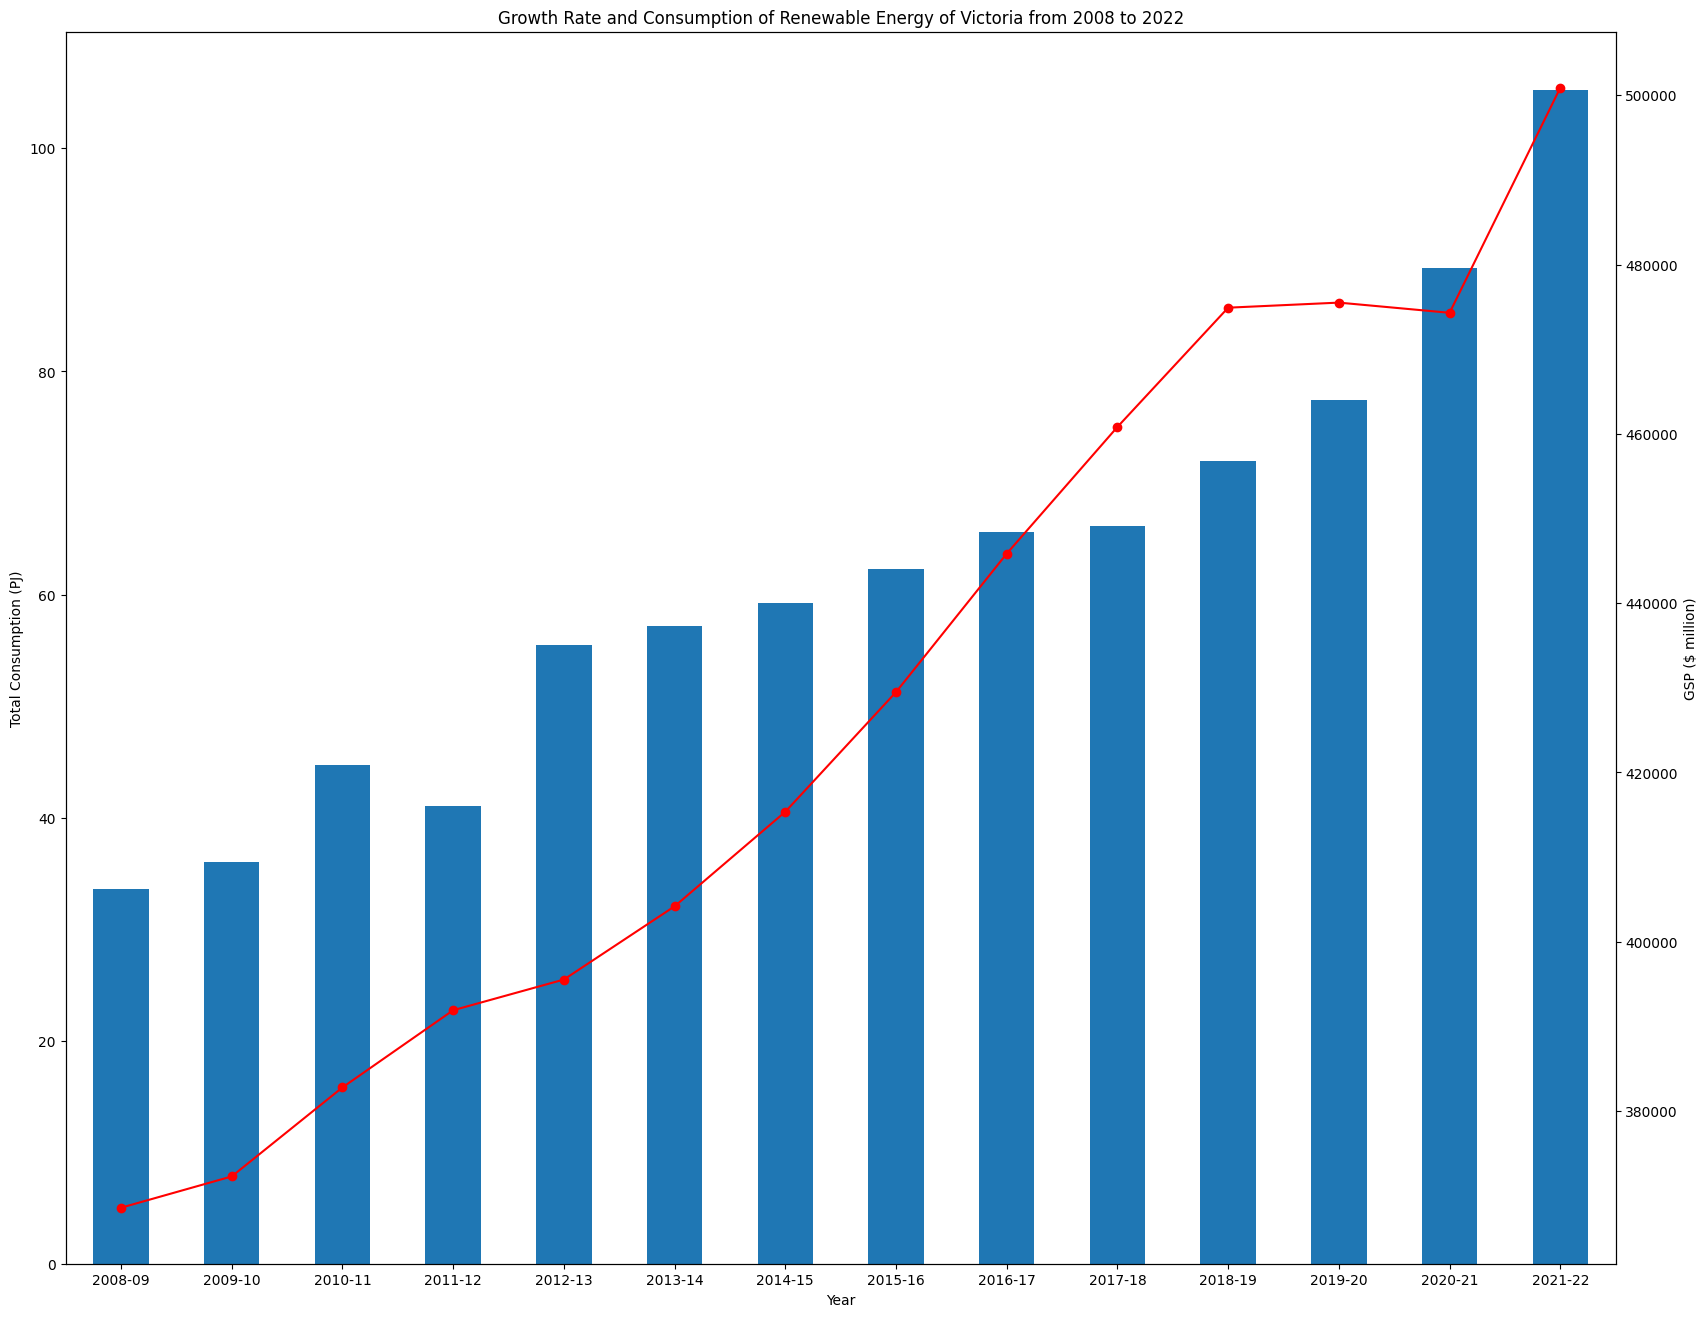

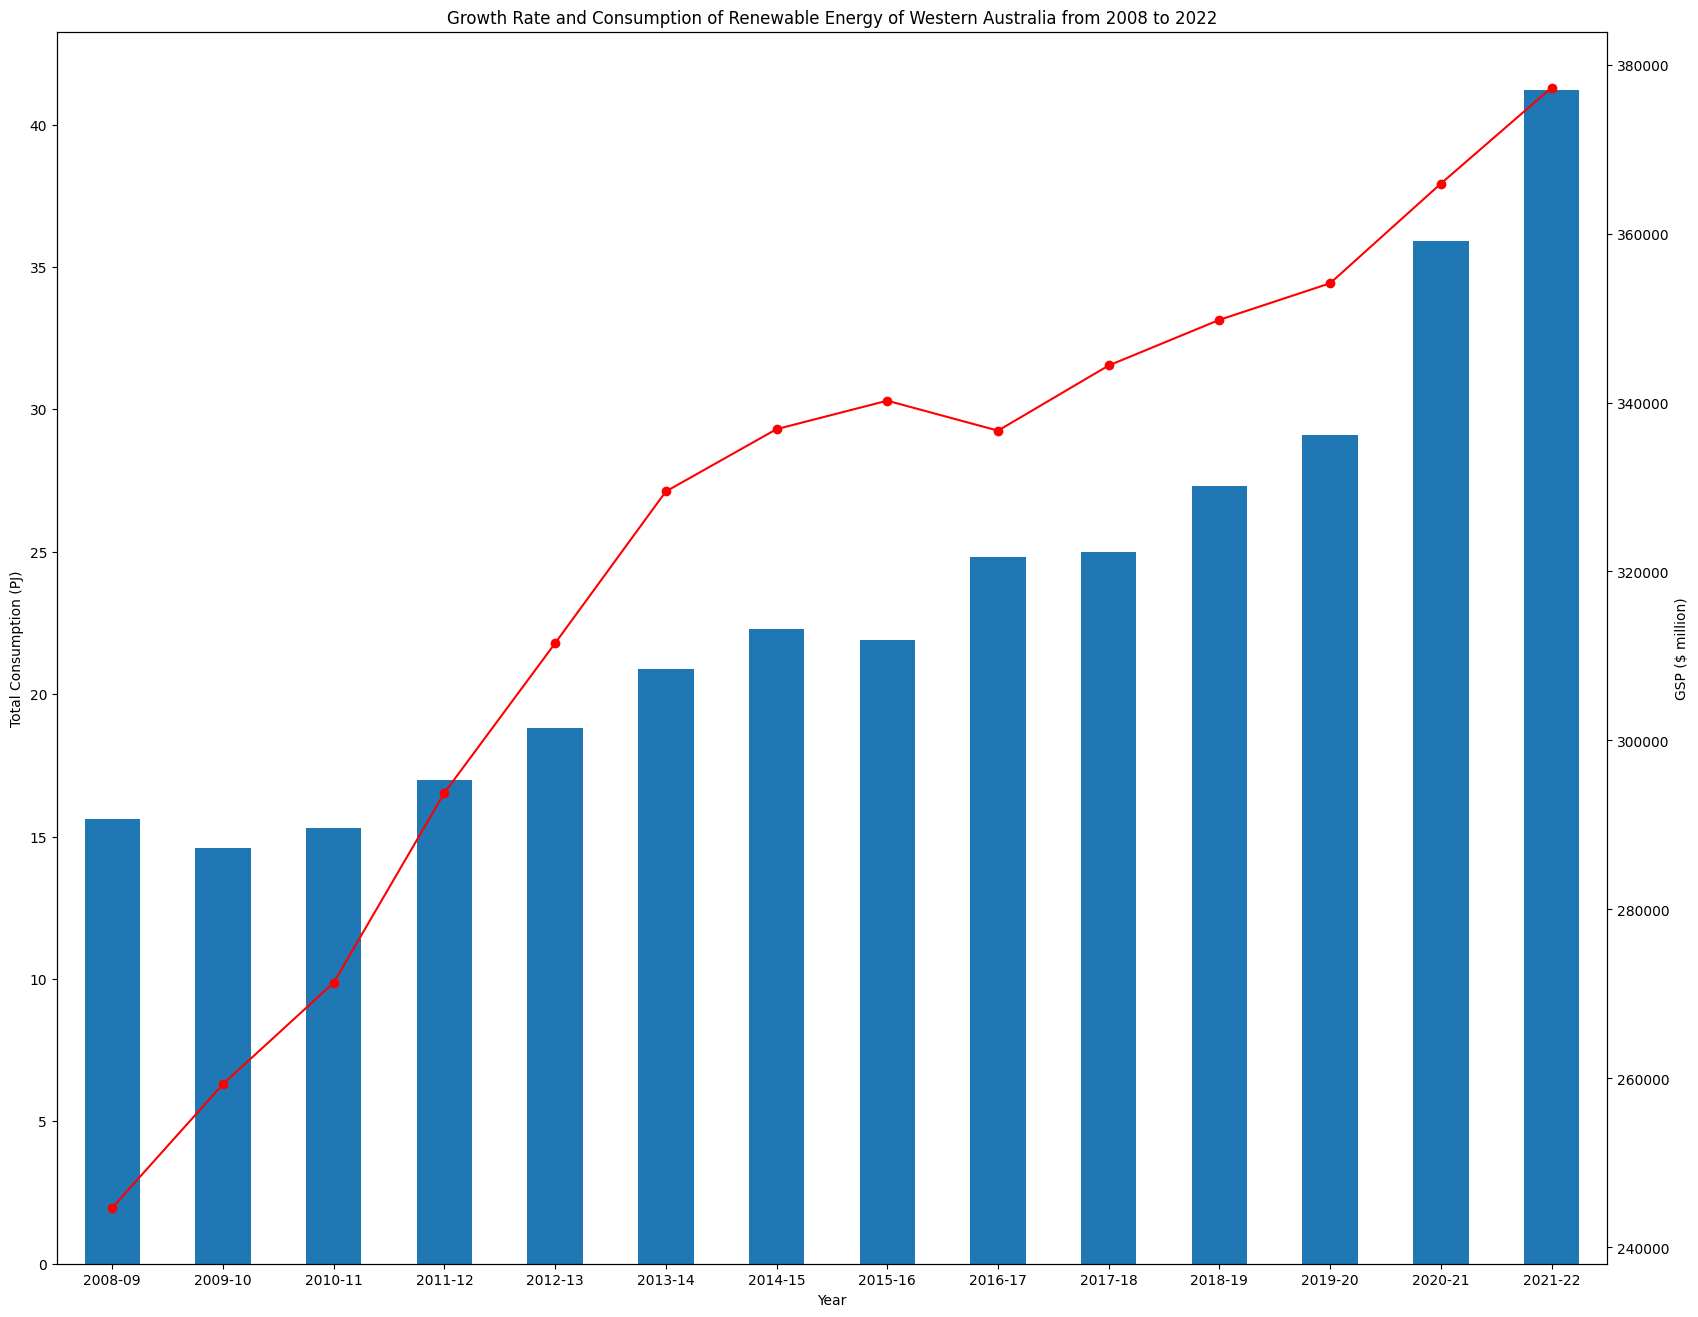

In [ ]:
#Question C9: Analyse and compare the growth rate of the GSP and the consumption of renewable energy for each state
#create a mixed chart for New South Wales
#plot the bar chart of Renewables Consumption
fig, ax1 = plt.subplots(figsize=(20, 16))
renewablesgsp_nsw_df.plot(kind='bar', x='Year', y='Renewables (PJ)', ax=ax1, legend=False)
plt.title(f'Growth Rate and Consumption of Renewable Energy of New South Wales from 2008 to 2022')
ax1.set_xlabel(f'Year')
ax1.set_ylabel(f'Total Consumption (PJ)')
ax1.tick_params(axis='y')
ax1.set_xticklabels(renewablesgsp_nsw_df['Year'], rotation=0)
#plot the line of GSP in the same bar chart
ax2 = ax1.twinx()
ax2.plot(renewablesgsp_nsw_df['Year'], renewablesgsp_nsw_df['GSP ($ million)'], color='red', marker='o', linestyle='-', label='GSP ($ million)')
ax2.set_ylabel('GSP ($ million)')
ax2.tick_params(axis='y')
plt.show()

#create a mixed chart for Northern Territory
#plot the bar chart of Renewables Consumption
fig, ax1 = plt.subplots(figsize=(20, 16))
renewablesgsp_nt_df.plot(kind='bar', x='Year', y='Renewables (PJ)', ax=ax1, legend=False)
plt.title(f'Growth Rate and Consumption of Renewable Energy of Northern Territory from 2008 to 2022')
ax1.set_xlabel(f'Year')
ax1.set_ylabel(f'Total Consumption (PJ)')
ax1.tick_params(axis='y')
ax1.set_xticklabels(renewablesgsp_nt_df['Year'], rotation=0)
#plot the line of GSP in the same bar chart
ax2 = ax1.twinx()
ax2.plot(renewablesgsp_nsw_df['Year'], renewablesgsp_nt_df['GSP ($ million)'], color='red', marker='o', linestyle='-', label='GSP ($ million)')
ax2.set_ylabel('GSP ($ million)')
ax2.tick_params(axis='y')
plt.show()

#create a mixed chart for Queensland
#plot the bar chart of Renewables Consumption
fig, ax1 = plt.subplots(figsize=(20, 16))
renewablesgsp_qld_df.plot(kind='bar', x='Year', y='Renewables (PJ)', ax=ax1, legend=False)
plt.title(f'Growth Rate and Consumption of Renewable Energy of Queensland from 2008 to 2022')
ax1.set_xlabel(f'Year')
ax1.set_ylabel(f'Total Consumption (PJ)')
ax1.tick_params(axis='y')
ax1.set_xticklabels(renewablesgsp_qld_df['Year'], rotation=0)
#plot the line of GSP in the same bar chart
ax2 = ax1.twinx()
ax2.plot(renewablesgsp_qld_df['Year'], renewablesgsp_qld_df['GSP ($ million)'], color='red', marker='o', linestyle='-', label='GSP ($ million)')
ax2.set_ylabel('GSP ($ million)')
ax2.tick_params(axis='y')
plt.show()

#create a mixed chart for South Australia
#plot the bar chart of Renewables Consumption
fig, ax1 = plt.subplots(figsize=(20, 16))
renewablesgsp_sa_df.plot(kind='bar', x='Year', y='Renewables (PJ)', ax=ax1, legend=False)
plt.title(f'Growth Rate and Consumption of Renewable Energy of South Australia from 2008 to 2022')
ax1.set_xlabel(f'Year')
ax1.set_ylabel(f'Total Consumption (PJ)')
ax1.tick_params(axis='y')
ax1.set_xticklabels(renewablesgsp_sa_df['Year'], rotation=0)
#plot the line of GSP in the same bar chart
ax2 = ax1.twinx()
ax2.plot(renewablesgsp_sa_df['Year'], renewablesgsp_sa_df['GSP ($ million)'], color='red', marker='o', linestyle='-', label='GSP ($ million)')
ax2.set_ylabel('GSP ($ million)')
ax2.tick_params(axis='y')
plt.show()

#create a mixed chart for Tasmania
#plot the bar chart of Renewables Consumption
fig, ax1 = plt.subplots(figsize=(20, 16))
renewablesgsp_tas_df.plot(kind='bar', x='Year', y='Renewables (PJ)', ax=ax1, legend=False)
plt.title(f'Growth Rate and Consumption of Renewable Energy of Tasmania from 2008 to 2022')
ax1.set_xlabel(f'Year')
ax1.set_ylabel(f'Total Consumption (PJ)')
ax1.tick_params(axis='y')
ax1.set_xticklabels(renewablesgsp_tas_df['Year'], rotation=0)
#plot the line of GSP in the same bar chart
ax2 = ax1.twinx()
ax2.plot(renewablesgsp_tas_df['Year'], renewablesgsp_tas_df['GSP ($ million)'], color='red', marker='o', linestyle='-', label='GSP ($ million)')
ax2.set_ylabel('GSP ($ million)')
ax2.tick_params(axis='y')
plt.show()

#create a mixed chart for Victoria
#plot the bar chart of Renewables Consumption
fig, ax1 = plt.subplots(figsize=(20, 16))
renewablesgsp_vic_df.plot(kind='bar', x='Year', y='Renewables (PJ)', ax=ax1, legend=False)
plt.title(f'Growth Rate and Consumption of Renewable Energy of Victoria from 2008 to 2022')
ax1.set_xlabel(f'Year')
ax1.set_ylabel(f'Total Consumption (PJ)')
ax1.tick_params(axis='y')
ax1.set_xticklabels(renewablesgsp_vic_df['Year'], rotation=0)
#plot the line of GSP in the same bar chart
ax2 = ax1.twinx()
ax2.plot(renewablesgsp_vic_df['Year'], renewablesgsp_vic_df['GSP ($ million)'], color='red', marker='o', linestyle='-', label='GSP ($ million)')
ax2.set_ylabel('GSP ($ million)')
ax2.tick_params(axis='y')
plt.show()

#create a mixed chart for Western Australia
#plot the bar chart of Renewables Consumption
fig, ax1 = plt.subplots(figsize=(20, 16))
renewablesgsp_wa_df.plot(kind='bar', x='Year', y='Renewables (PJ)', ax=ax1, legend=False)
plt.title(f'Growth Rate and Consumption of Renewable Energy of Western Australia from 2008 to 2022')
ax1.set_xlabel(f'Year')
ax1.set_ylabel(f'Total Consumption (PJ)')
ax1.tick_params(axis='y')
ax1.set_xticklabels(renewablesgsp_wa_df['Year'], rotation=0)
#plot the line of GSP in the same bar chart
ax2 = ax1.twinx()
ax2.plot(renewablesgsp_wa_df['Year'], renewablesgsp_wa_df['GSP ($ million)'], color='red', marker='o', linestyle='-', label='GSP ($ million)')
ax2.set_ylabel('GSP ($ million)')
ax2.tick_params(axis='y')
plt.show()